# Basics of NetworkX API, using Twitter network
To get you up and running with the NetworkX API, we will run through some basic functions that let you query a Twitter network that has been pre-loaded for you and is available in the IPython Shell as T. The Twitter network comes from KONECT, and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata.

You're now going to use the NetworkX API to explore some basic properties of the network, and are encouraged to experiment with the data in the IPython Shell.

In [9]:
import networkx as nx

In [14]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [11]:
T = pd.read_pickle('../data/35. Network Analysis/ego-twitter.p')

## Queries on a graph
Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the `.nodes()` and `.edges()` methods that Eric went over in the video. The `.nodes()` method returns a list of nodes, while the `.edges()` method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument `data=True` in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

- Use a list comprehension to get a list of nodes from the graph `T` that have the `'occupation'` label of `'scientist'`.
    - The output expression `n` has been specified for you, along with the iterator variables `n` and `d`. Your task is to fill in the iterable and the conditional expression.
    - Use the `.nodes()` method of `T` access its nodes, and be sure to specify `data=True` to obtain the metadata for the nodes.
    - The iterator variable `d` is a dictionary. The key of interest here is `'occupation'` and value of interest is `'scientist'`.

In [36]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

- Use a list comprehension to get a list of edges from the graph `T` that were formed for at least 6 years, i.e., from before 1 Jan 2010.
    - Your task once again is to fill in the iterable and conditional expression.
    - Use the `.edges()` method of `T` to access its edges. Be sure to obtain the metadata for the edges as well.
    - The dates are stored as `datetime.date` objects in the metadata dictionary `d`, under the key `'date'`. To access the date `1 Jan 2009`, for example, the dictionary value would be `date(2009, 1, 1)`.

In [37]:
# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010,1,1)]

## Types of graphs
### Checking the un/directed status of a graph
Which type of graph do you think the Twitter network data you have been working with corresponds to? Use Python's built-in type() function in the IPython Shell to find out. 

In [38]:
type(T)

networkx.classes.digraph.DiGraph

## Specifying a weight on edges
Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In `NetworkX`, the weight is indicated by the `'weight'` key in the metadata dictionary.

- Set the 'weight' attribute of the edge between node 1 and 10 of T to be equal to 2. Refer to the following template to set an attribute of an edge: `network_name.edges[node1, node2]['attribute'] = value`. Here, the `'attribute'` is `'weight'`.
- Set the weight of every edge involving node 293 to be equal to 1.1. To do this:
    - Using a for loop, iterate over all the edges of `T`, including the metadata.
        - If 293 is involved in the list of nodes `[u, v]`:
        - Set the weight of the edge between u and v to be 1.1.

In [45]:
T.edges

OutEdgeView([(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (16, 563), (16, 5384), (16, 5385), (16, 7881), (16, 573), (16, 7354), (16, 7355), (16, 7358), (16, 18), (16, 5586), (16, 580), (16, 35), (16, 10981), (16, 36), (16, 48), (16, 590), (16, 10982), (18, 6163), (18, 5578), (18, 16), (18, 7609), (18, 24), (18, 35), (18, 36), (18, 11609), (18, 11610), (18, 1326), (19, 5), (19, 8), (19, 12035), (19, 5399), (19, 11), (19, 5380), (19, 13), (19, 15), (19, 4390), (19, 17), (19, 5411), (19, 20), (19, 21), (19, 24), (19, 5426), (19, 12036), (19, 12037), (19, 30), (19, 12038), (19, 5437), (19, 5439), (19, 31), (19, 35), (19, 36),

In [46]:
# Set the weight of the edge
T.edges[1,10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u,v]:

        # Set the weight to 1.1
        T.edges[u,v]['weight'] = 1.1

In [47]:
for u, v, d in T.edges(data=True):
    print(u,v,d)

1 3 {'date': datetime.date(2012, 11, 16)}
1 4 {'date': datetime.date(2013, 6, 7)}
1 5 {'date': datetime.date(2009, 7, 27)}
1 6 {'date': datetime.date(2014, 12, 18)}
1 7 {'date': datetime.date(2010, 10, 18)}
1 8 {'date': datetime.date(2012, 4, 18)}
1 9 {'date': datetime.date(2007, 10, 14)}
1 10 {'date': datetime.date(2012, 9, 8), 'weight': 2}
1 11 {'date': datetime.date(2010, 1, 6)}
1 12 {'date': datetime.date(2012, 12, 27)}
1 13 {'date': datetime.date(2008, 12, 18)}
1 14 {'date': datetime.date(2014, 5, 25)}
1 15 {'date': datetime.date(2009, 11, 12)}
1 16 {'date': datetime.date(2008, 8, 6)}
1 17 {'date': datetime.date(2007, 8, 11)}
1 18 {'date': datetime.date(2009, 10, 7)}
1 19 {'date': datetime.date(2008, 7, 24)}
1 20 {'date': datetime.date(2013, 11, 18)}
1 21 {'date': datetime.date(2011, 3, 28)}
1 22 {'date': datetime.date(2013, 3, 4)}
1 23 {'date': datetime.date(2012, 4, 20)}
1 24 {'date': datetime.date(2009, 6, 6)}
1 25 {'date': datetime.date(2013, 6, 18)}
1 26 {'date': datetime.dat

166 186 {'date': datetime.date(2013, 3, 4)}
166 187 {'date': datetime.date(2009, 11, 20)}
166 188 {'date': datetime.date(2007, 1, 11)}
166 189 {'date': datetime.date(2012, 1, 13)}
179 12656 {'date': datetime.date(2013, 11, 27)}
179 12657 {'date': datetime.date(2009, 12, 9)}
179 12658 {'date': datetime.date(2011, 10, 10)}
179 12659 {'date': datetime.date(2007, 10, 28)}
179 12660 {'date': datetime.date(2010, 7, 5)}
179 1205 {'date': datetime.date(2013, 1, 26)}
179 12661 {'date': datetime.date(2007, 9, 11)}
179 12662 {'date': datetime.date(2014, 10, 10)}
179 12663 {'date': datetime.date(2012, 4, 6)}
179 12664 {'date': datetime.date(2014, 11, 7)}
179 180 {'date': datetime.date(2013, 10, 6)}
179 12665 {'date': datetime.date(2011, 3, 6)}
179 12666 {'date': datetime.date(2010, 2, 6)}
179 12667 {'date': datetime.date(2012, 10, 7)}
179 12668 {'date': datetime.date(2012, 8, 14)}
179 12669 {'date': datetime.date(2013, 11, 21)}
179 12670 {'date': datetime.date(2009, 5, 13)}
179 12671 {'date': date

380 21733 {'date': datetime.date(2013, 11, 21)}
380 21734 {'date': datetime.date(2011, 9, 16)}
380 21735 {'date': datetime.date(2009, 8, 10)}
380 21736 {'date': datetime.date(2013, 4, 10)}
380 369 {'date': datetime.date(2014, 5, 24)}
380 21737 {'date': datetime.date(2009, 2, 1)}
380 21738 {'date': datetime.date(2008, 3, 17)}
380 371 {'date': datetime.date(2011, 12, 15)}
380 372 {'date': datetime.date(2010, 7, 6)}
380 21739 {'date': datetime.date(2010, 6, 11)}
380 21740 {'date': datetime.date(2008, 2, 23)}
380 21741 {'date': datetime.date(2012, 7, 13)}
380 21742 {'date': datetime.date(2013, 2, 23)}
380 21743 {'date': datetime.date(2012, 7, 7)}
380 21744 {'date': datetime.date(2014, 6, 21)}
380 21745 {'date': datetime.date(2009, 10, 10)}
380 21746 {'date': datetime.date(2010, 9, 6)}
380 375 {'date': datetime.date(2010, 7, 20)}
380 21747 {'date': datetime.date(2010, 5, 21)}
380 376 {'date': datetime.date(2008, 3, 1)}
380 777 {'date': datetime.date(2012, 11, 24)}
380 1287 {'date': datetime

642 651 {'date': datetime.date(2013, 12, 26)}
642 652 {'date': datetime.date(2009, 7, 17)}
642 653 {'date': datetime.date(2011, 7, 26)}
642 654 {'date': datetime.date(2011, 10, 6)}
642 655 {'date': datetime.date(2012, 8, 12)}
642 656 {'date': datetime.date(2007, 12, 22)}
642 657 {'date': datetime.date(2009, 4, 24)}
642 658 {'date': datetime.date(2010, 2, 12)}
642 659 {'date': datetime.date(2007, 5, 4)}
642 660 {'date': datetime.date(2009, 6, 6)}
642 661 {'date': datetime.date(2007, 2, 15)}
644 644 {'date': datetime.date(2008, 2, 23)}
662 663 {'date': datetime.date(2013, 4, 22)}
662 331 {'date': datetime.date(2008, 3, 3)}
662 664 {'date': datetime.date(2008, 9, 27)}
662 665 {'date': datetime.date(2007, 2, 27)}
662 666 {'date': datetime.date(2007, 7, 19)}
667 668 {'date': datetime.date(2014, 11, 10)}
667 669 {'date': datetime.date(2014, 2, 3)}
667 670 {'date': datetime.date(2012, 7, 28)}
667 671 {'date': datetime.date(2008, 8, 7)}
667 672 {'date': datetime.date(2010, 5, 24)}
667 673 {'da

825 852 {'date': datetime.date(2014, 12, 24)}
825 6488 {'date': datetime.date(2014, 1, 17)}
825 854 {'date': datetime.date(2014, 1, 25)}
825 3974 {'date': datetime.date(2013, 1, 23)}
825 6489 {'date': datetime.date(2007, 2, 7)}
825 6490 {'date': datetime.date(2009, 5, 4)}
825 855 {'date': datetime.date(2013, 4, 5)}
825 856 {'date': datetime.date(2014, 10, 26)}
825 6491 {'date': datetime.date(2012, 10, 16)}
825 858 {'date': datetime.date(2011, 8, 26)}
825 6492 {'date': datetime.date(2012, 11, 19)}
825 859 {'date': datetime.date(2011, 5, 12)}
825 6493 {'date': datetime.date(2007, 1, 4)}
825 3019 {'date': datetime.date(2007, 9, 13)}
825 860 {'date': datetime.date(2012, 10, 4)}
825 861 {'date': datetime.date(2007, 11, 12)}
825 6494 {'date': datetime.date(2010, 10, 26)}
825 6495 {'date': datetime.date(2011, 1, 24)}
825 862 {'date': datetime.date(2012, 11, 19)}
825 5028 {'date': datetime.date(2009, 9, 11)}
825 863 {'date': datetime.date(2009, 5, 25)}
825 864 {'date': datetime.date(2012, 11, 

905 12428 {'date': datetime.date(2009, 10, 16)}
905 12429 {'date': datetime.date(2007, 7, 5)}
905 12430 {'date': datetime.date(2011, 1, 16)}
905 12431 {'date': datetime.date(2012, 9, 7)}
905 12432 {'date': datetime.date(2010, 10, 21)}
905 12433 {'date': datetime.date(2008, 5, 12)}
905 12434 {'date': datetime.date(2010, 2, 12)}
905 12435 {'date': datetime.date(2012, 10, 9)}
905 12436 {'date': datetime.date(2008, 1, 13)}
905 12437 {'date': datetime.date(2011, 2, 22)}
905 12438 {'date': datetime.date(2008, 10, 26)}
905 12439 {'date': datetime.date(2012, 5, 7)}
905 12440 {'date': datetime.date(2010, 10, 20)}
905 12441 {'date': datetime.date(2009, 1, 18)}
905 12442 {'date': datetime.date(2007, 10, 8)}
905 12443 {'date': datetime.date(2008, 5, 9)}
905 12444 {'date': datetime.date(2014, 9, 17)}
905 12445 {'date': datetime.date(2011, 8, 9)}
905 12446 {'date': datetime.date(2012, 10, 10)}
905 12447 {'date': datetime.date(2013, 1, 27)}
905 12448 {'date': datetime.date(2009, 10, 23)}
905 12449 {'

1093 1135 {'date': datetime.date(2009, 4, 5)}
1093 4944 {'date': datetime.date(2012, 2, 4)}
1093 1136 {'date': datetime.date(2014, 6, 8)}
1093 1137 {'date': datetime.date(2010, 3, 17)}
1093 1139 {'date': datetime.date(2010, 8, 27)}
1093 1140 {'date': datetime.date(2009, 4, 23)}
1093 1141 {'date': datetime.date(2011, 7, 28)}
1095 537 {'date': datetime.date(2014, 1, 5)}
1095 7751 {'date': datetime.date(2012, 4, 8)}
1095 3385 {'date': datetime.date(2011, 7, 17)}
1095 7952 {'date': datetime.date(2011, 5, 16)}
1095 3390 {'date': datetime.date(2012, 12, 20)}
1095 1085 {'date': datetime.date(2014, 2, 15)}
1095 7953 {'date': datetime.date(2008, 10, 14)}
1095 3392 {'date': datetime.date(2008, 8, 27)}
1095 7954 {'date': datetime.date(2010, 7, 3)}
1095 3393 {'date': datetime.date(2011, 6, 6)}
1095 1092 {'date': datetime.date(2014, 5, 15)}
1095 7955 {'date': datetime.date(2011, 2, 23)}
1095 3396 {'date': datetime.date(2008, 7, 26)}
1095 3401 {'date': datetime.date(2008, 11, 7)}
1095 1102 {'date': 

1271 10967 {'date': datetime.date(2014, 2, 22)}
1271 7722 {'date': datetime.date(2014, 12, 27)}
1271 16707 {'date': datetime.date(2009, 4, 25)}
1271 7723 {'date': datetime.date(2011, 12, 26)}
1271 14171 {'date': datetime.date(2014, 2, 2)}
1271 14173 {'date': datetime.date(2014, 12, 12)}
1271 16708 {'date': datetime.date(2012, 6, 10)}
1271 10970 {'date': datetime.date(2014, 2, 18)}
1271 10972 {'date': datetime.date(2007, 11, 21)}
1271 16709 {'date': datetime.date(2007, 3, 20)}
1271 10973 {'date': datetime.date(2012, 5, 18)}
1271 184 {'date': datetime.date(2011, 3, 14)}
1271 1273 {'date': datetime.date(2013, 9, 28)}
1271 16710 {'date': datetime.date(2008, 8, 6)}
1271 16711 {'date': datetime.date(2009, 7, 14)}
1271 7726 {'date': datetime.date(2010, 7, 24)}
1271 16712 {'date': datetime.date(2009, 12, 28)}
1271 1284 {'date': datetime.date(2009, 10, 22)}
1271 16713 {'date': datetime.date(2008, 2, 16)}
1271 16714 {'date': datetime.date(2013, 9, 9)}
1271 16715 {'date': datetime.date(2009, 11, 

1480 1080 {'date': datetime.date(2010, 8, 24)}
1480 1082 {'date': datetime.date(2007, 5, 1)}
1480 1094 {'date': datetime.date(2007, 8, 11)}
1480 1097 {'date': datetime.date(2014, 1, 9)}
1480 540 {'date': datetime.date(2011, 5, 28)}
1480 1099 {'date': datetime.date(2008, 12, 12)}
1480 1100 {'date': datetime.date(2009, 12, 5)}
1480 1481 {'date': datetime.date(2013, 5, 12)}
1480 543 {'date': datetime.date(2012, 4, 23)}
1480 1482 {'date': datetime.date(2010, 9, 13)}
1480 1115 {'date': datetime.date(2012, 3, 18)}
1480 1123 {'date': datetime.date(2014, 9, 21)}
1480 1127 {'date': datetime.date(2008, 12, 1)}
1480 1128 {'date': datetime.date(2011, 9, 17)}
1480 1130 {'date': datetime.date(2013, 3, 13)}
1480 1483 {'date': datetime.date(2010, 6, 16)}
1480 1135 {'date': datetime.date(2008, 3, 4)}
1480 1137 {'date': datetime.date(2010, 4, 12)}
1480 1141 {'date': datetime.date(2014, 7, 9)}
1484 1485 {'date': datetime.date(2007, 9, 22)}
1484 1486 {'date': datetime.date(2008, 2, 23)}
1484 1487 {'date':

1696 20612 {'date': datetime.date(2011, 4, 10)}
1696 15722 {'date': datetime.date(2012, 12, 5)}
1696 20613 {'date': datetime.date(2007, 4, 11)}
1696 20614 {'date': datetime.date(2014, 7, 4)}
1696 20615 {'date': datetime.date(2008, 6, 22)}
1696 20616 {'date': datetime.date(2008, 11, 12)}
1696 15724 {'date': datetime.date(2007, 5, 3)}
1696 20617 {'date': datetime.date(2008, 10, 1)}
1696 20618 {'date': datetime.date(2014, 9, 28)}
1696 20619 {'date': datetime.date(2012, 12, 22)}
1696 20620 {'date': datetime.date(2009, 6, 19)}
1696 20621 {'date': datetime.date(2013, 9, 3)}
1696 20622 {'date': datetime.date(2009, 5, 18)}
1696 20623 {'date': datetime.date(2008, 3, 19)}
1696 20624 {'date': datetime.date(2011, 3, 21)}
1696 20625 {'date': datetime.date(2014, 11, 6)}
1696 20626 {'date': datetime.date(2014, 2, 7)}
1696 20627 {'date': datetime.date(2013, 8, 1)}
1696 20628 {'date': datetime.date(2014, 2, 23)}
1696 20629 {'date': datetime.date(2012, 3, 26)}
1696 20630 {'date': datetime.date(2009, 7, 

1962 22555 {'date': datetime.date(2013, 8, 1)}
1962 22556 {'date': datetime.date(2012, 10, 25)}
1962 22557 {'date': datetime.date(2010, 3, 23)}
1962 3882 {'date': datetime.date(2009, 7, 21)}
1962 22558 {'date': datetime.date(2009, 9, 14)}
1962 762 {'date': datetime.date(2008, 7, 5)}
1962 22559 {'date': datetime.date(2011, 12, 7)}
1962 22560 {'date': datetime.date(2012, 4, 10)}
1962 5208 {'date': datetime.date(2007, 7, 20)}
1962 22561 {'date': datetime.date(2013, 11, 24)}
1962 22562 {'date': datetime.date(2011, 5, 26)}
1962 513 {'date': datetime.date(2011, 5, 6)}
1962 22563 {'date': datetime.date(2013, 10, 24)}
1962 22564 {'date': datetime.date(2012, 11, 13)}
1962 22565 {'date': datetime.date(2013, 7, 25)}
1962 22125 {'date': datetime.date(2011, 1, 23)}
1962 14520 {'date': datetime.date(2007, 12, 26)}
1962 22566 {'date': datetime.date(2011, 4, 12)}
1962 22567 {'date': datetime.date(2007, 7, 2)}
1962 22568 {'date': datetime.date(2008, 6, 13)}
1962 22569 {'date': datetime.date(2008, 9, 4)

2050 2040 {'date': datetime.date(2008, 6, 8)}
2050 2046 {'date': datetime.date(2011, 11, 17)}
2050 2062 {'date': datetime.date(2014, 3, 7)}
2050 2063 {'date': datetime.date(2014, 4, 13)}
2050 2066 {'date': datetime.date(2007, 5, 6)}
2050 2068 {'date': datetime.date(2011, 7, 1)}
2050 2069 {'date': datetime.date(2012, 7, 8)}
2050 2070 {'date': datetime.date(2013, 12, 15)}
2050 2073 {'date': datetime.date(2009, 7, 19)}
2050 2074 {'date': datetime.date(2009, 8, 15)}
2050 2075 {'date': datetime.date(2012, 10, 7)}
2050 4632 {'date': datetime.date(2012, 12, 12)}
2050 2083 {'date': datetime.date(2014, 10, 3)}
2050 2086 {'date': datetime.date(2008, 1, 25)}
2050 2088 {'date': datetime.date(2014, 3, 3)}
2050 2091 {'date': datetime.date(2011, 5, 3)}
2050 2093 {'date': datetime.date(2012, 9, 3)}
2073 2041 {'date': datetime.date(2008, 9, 16)}
2073 2043 {'date': datetime.date(2009, 12, 3)}
2073 4631 {'date': datetime.date(2010, 12, 4)}
2073 2044 {'date': datetime.date(2009, 9, 12)}
2073 2045 {'date':

2385 2456 {'date': datetime.date(2012, 12, 4)}
2385 2033 {'date': datetime.date(2010, 2, 22)}
2385 2457 {'date': datetime.date(2010, 10, 7)}
2385 2458 {'date': datetime.date(2014, 7, 6)}
2385 2459 {'date': datetime.date(2011, 4, 21)}
2385 2460 {'date': datetime.date(2012, 12, 20)}
2405 2385 {'date': datetime.date(2014, 9, 23)}
2405 6090 {'date': datetime.date(2014, 10, 10)}
2405 6091 {'date': datetime.date(2009, 5, 28)}
2405 6092 {'date': datetime.date(2011, 6, 3)}
2405 6093 {'date': datetime.date(2008, 9, 26)}
2405 6094 {'date': datetime.date(2011, 3, 5)}
2405 6095 {'date': datetime.date(2012, 10, 8)}
2405 2413 {'date': datetime.date(2010, 9, 26)}
2405 6096 {'date': datetime.date(2012, 7, 14)}
2405 6097 {'date': datetime.date(2013, 12, 25)}
2405 6098 {'date': datetime.date(2009, 5, 18)}
2405 6099 {'date': datetime.date(2009, 5, 22)}
2405 6100 {'date': datetime.date(2007, 12, 23)}
2405 6101 {'date': datetime.date(2008, 3, 12)}
2405 3554 {'date': datetime.date(2011, 1, 24)}
2405 6102 {'

2503 17824 {'date': datetime.date(2008, 4, 21)}
2503 4132 {'date': datetime.date(2013, 1, 22)}
2503 694 {'date': datetime.date(2014, 6, 10)}
2503 1987 {'date': datetime.date(2012, 12, 16)}
2503 6457 {'date': datetime.date(2008, 9, 18)}
2503 17825 {'date': datetime.date(2012, 12, 11)}
2503 14370 {'date': datetime.date(2010, 3, 16)}
2503 17826 {'date': datetime.date(2010, 12, 19)}
2503 17827 {'date': datetime.date(2007, 12, 6)}
2503 16279 {'date': datetime.date(2009, 2, 27)}
2503 3980 {'date': datetime.date(2007, 8, 17)}
2503 17828 {'date': datetime.date(2012, 1, 12)}
2503 17829 {'date': datetime.date(2012, 5, 6)}
2503 17830 {'date': datetime.date(2007, 11, 24)}
2503 1008 {'date': datetime.date(2009, 3, 18)}
2503 5356 {'date': datetime.date(2008, 5, 5)}
2503 11866 {'date': datetime.date(2012, 1, 25)}
2503 4133 {'date': datetime.date(2014, 10, 5)}
2503 8882 {'date': datetime.date(2009, 6, 20)}
2503 17831 {'date': datetime.date(2010, 5, 3)}
2503 3981 {'date': datetime.date(2008, 4, 1)}
250

2598 2686 {'date': datetime.date(2007, 11, 10)}
2598 2687 {'date': datetime.date(2013, 7, 22)}
2598 2688 {'date': datetime.date(2008, 4, 22)}
2598 2689 {'date': datetime.date(2013, 11, 14)}
2598 2690 {'date': datetime.date(2012, 9, 17)}
2598 2691 {'date': datetime.date(2012, 1, 22)}
2598 2692 {'date': datetime.date(2007, 12, 28)}
2598 2693 {'date': datetime.date(2012, 8, 6)}
2598 2694 {'date': datetime.date(2014, 12, 13)}
2598 2695 {'date': datetime.date(2007, 3, 9)}
2598 2696 {'date': datetime.date(2010, 3, 21)}
2598 2697 {'date': datetime.date(2012, 1, 16)}
2598 2698 {'date': datetime.date(2011, 8, 1)}
2598 2699 {'date': datetime.date(2008, 2, 26)}
2598 2700 {'date': datetime.date(2009, 3, 13)}
2598 2701 {'date': datetime.date(2014, 2, 28)}
2598 2702 {'date': datetime.date(2013, 12, 8)}
2598 2703 {'date': datetime.date(2014, 3, 17)}
2598 2704 {'date': datetime.date(2013, 3, 26)}
2598 2705 {'date': datetime.date(2011, 7, 24)}
2598 2706 {'date': datetime.date(2013, 10, 9)}
2598 2707 {'

2677 13946 {'date': datetime.date(2012, 7, 15)}
2677 2606 {'date': datetime.date(2012, 1, 7)}
2677 13947 {'date': datetime.date(2011, 7, 24)}
2677 13948 {'date': datetime.date(2007, 5, 3)}
2677 13949 {'date': datetime.date(2013, 5, 11)}
2677 13950 {'date': datetime.date(2009, 12, 11)}
2677 13951 {'date': datetime.date(2011, 7, 19)}
2677 13952 {'date': datetime.date(2008, 11, 10)}
2677 13953 {'date': datetime.date(2014, 6, 11)}
2677 13954 {'date': datetime.date(2009, 8, 26)}
2677 5784 {'date': datetime.date(2011, 5, 19)}
2677 2611 {'date': datetime.date(2013, 6, 10)}
2677 6758 {'date': datetime.date(2013, 7, 10)}
2677 2598 {'date': datetime.date(2007, 5, 14)}
2677 2616 {'date': datetime.date(2011, 7, 6)}
2677 13955 {'date': datetime.date(2013, 10, 5)}
2677 2618 {'date': datetime.date(2009, 3, 15)}
2677 13956 {'date': datetime.date(2010, 9, 22)}
2677 2621 {'date': datetime.date(2007, 8, 21)}
2677 6148 {'date': datetime.date(2010, 5, 8)}
2677 13957 {'date': datetime.date(2014, 6, 18)}
267

2809 2815 {'date': datetime.date(2011, 6, 2)}
2809 2816 {'date': datetime.date(2008, 4, 16)}
2809 2817 {'date': datetime.date(2011, 8, 5)}
2809 2818 {'date': datetime.date(2008, 6, 10)}
2809 2819 {'date': datetime.date(2009, 5, 9)}
2820 2821 {'date': datetime.date(2010, 10, 7)}
2820 2822 {'date': datetime.date(2013, 3, 7)}
2820 2823 {'date': datetime.date(2011, 12, 1)}
2820 2824 {'date': datetime.date(2012, 12, 20)}
2820 2825 {'date': datetime.date(2012, 3, 1)}
2820 2826 {'date': datetime.date(2011, 10, 1)}
2820 2827 {'date': datetime.date(2012, 6, 19)}
2820 2828 {'date': datetime.date(2012, 7, 15)}
2820 2829 {'date': datetime.date(2009, 2, 24)}
2820 2830 {'date': datetime.date(2010, 4, 7)}
2820 2831 {'date': datetime.date(2013, 2, 19)}
2820 2832 {'date': datetime.date(2011, 11, 16)}
2820 2833 {'date': datetime.date(2013, 7, 27)}
2820 2834 {'date': datetime.date(2010, 6, 25)}
2820 2835 {'date': datetime.date(2013, 1, 11)}
2820 2836 {'date': datetime.date(2012, 2, 12)}
2820 2837 {'date'

3010 7581 {'date': datetime.date(2013, 2, 18)}
3010 9207 {'date': datetime.date(2009, 1, 3)}
3010 9208 {'date': datetime.date(2010, 9, 8)}
3010 7582 {'date': datetime.date(2010, 12, 28)}
3016 792 {'date': datetime.date(2013, 3, 20)}
3016 802 {'date': datetime.date(2011, 4, 15)}
3016 804 {'date': datetime.date(2008, 5, 15)}
3016 805 {'date': datetime.date(2010, 11, 5)}
3016 808 {'date': datetime.date(2008, 10, 5)}
3016 12828 {'date': datetime.date(2013, 11, 14)}
3016 809 {'date': datetime.date(2010, 1, 19)}
3016 810 {'date': datetime.date(2010, 3, 11)}
3016 3006 {'date': datetime.date(2011, 3, 3)}
3016 815 {'date': datetime.date(2009, 10, 18)}
3016 816 {'date': datetime.date(2009, 7, 15)}
3016 3007 {'date': datetime.date(2012, 11, 26)}
3016 819 {'date': datetime.date(2013, 1, 7)}
3016 820 {'date': datetime.date(2008, 7, 5)}
3016 821 {'date': datetime.date(2014, 1, 14)}
3016 12829 {'date': datetime.date(2014, 4, 11)}
3016 12830 {'date': datetime.date(2012, 11, 15)}
3016 825 {'date': date

3220 3664 {'date': datetime.date(2014, 5, 12)}
3220 3665 {'date': datetime.date(2008, 2, 25)}
3220 3666 {'date': datetime.date(2010, 1, 17)}
3220 3667 {'date': datetime.date(2011, 7, 17)}
3220 3668 {'date': datetime.date(2012, 2, 3)}
3220 3669 {'date': datetime.date(2011, 12, 22)}
3220 3670 {'date': datetime.date(2012, 5, 5)}
3220 1274 {'date': datetime.date(2007, 8, 28)}
3220 3671 {'date': datetime.date(2008, 11, 12)}
3220 3141 {'date': datetime.date(2012, 11, 14)}
3230 6326 {'date': datetime.date(2007, 6, 23)}
3230 6327 {'date': datetime.date(2014, 7, 20)}
3230 6328 {'date': datetime.date(2007, 2, 18)}
3230 6329 {'date': datetime.date(2011, 12, 17)}
3230 3217 {'date': datetime.date(2014, 8, 3)}
3230 6330 {'date': datetime.date(2013, 7, 7)}
3230 6331 {'date': datetime.date(2013, 4, 7)}
3230 6332 {'date': datetime.date(2010, 5, 12)}
3230 6333 {'date': datetime.date(2010, 2, 28)}
3230 6334 {'date': datetime.date(2014, 10, 26)}
3230 6335 {'date': datetime.date(2012, 8, 5)}
3230 6336 {'da

3531 3551 {'date': datetime.date(2012, 4, 9)}
3531 3552 {'date': datetime.date(2008, 1, 13)}
3531 3553 {'date': datetime.date(2012, 11, 6)}
3531 3554 {'date': datetime.date(2011, 2, 7)}
3531 3555 {'date': datetime.date(2012, 7, 9)}
3531 3556 {'date': datetime.date(2014, 1, 18)}
3531 3557 {'date': datetime.date(2009, 11, 12)}
3531 2443 {'date': datetime.date(2011, 5, 27)}
3531 3558 {'date': datetime.date(2009, 12, 15)}
3531 3559 {'date': datetime.date(2013, 11, 18)}
3531 3560 {'date': datetime.date(2014, 8, 21)}
3531 3561 {'date': datetime.date(2011, 7, 3)}
3531 3562 {'date': datetime.date(2011, 5, 18)}
3531 3563 {'date': datetime.date(2007, 8, 16)}
3531 3564 {'date': datetime.date(2014, 9, 9)}
3531 3565 {'date': datetime.date(2007, 8, 7)}
3531 3566 {'date': datetime.date(2012, 6, 14)}
3531 3567 {'date': datetime.date(2007, 8, 10)}
3531 3568 {'date': datetime.date(2010, 12, 5)}
3531 3569 {'date': datetime.date(2014, 2, 11)}
3531 3570 {'date': datetime.date(2008, 7, 18)}
3531 1369 {'date

3826 3828 {'date': datetime.date(2009, 9, 14)}
3826 3088 {'date': datetime.date(2013, 6, 13)}
3826 3829 {'date': datetime.date(2009, 4, 27)}
3826 3830 {'date': datetime.date(2014, 12, 6)}
3826 3831 {'date': datetime.date(2010, 10, 4)}
3826 680 {'date': datetime.date(2014, 2, 25)}
3826 3832 {'date': datetime.date(2011, 1, 27)}
3826 3833 {'date': datetime.date(2011, 12, 4)}
3826 3834 {'date': datetime.date(2011, 9, 17)}
3826 3835 {'date': datetime.date(2010, 6, 2)}
3826 3836 {'date': datetime.date(2012, 2, 5)}
3826 3098 {'date': datetime.date(2008, 5, 27)}
3826 3837 {'date': datetime.date(2008, 6, 7)}
3826 3838 {'date': datetime.date(2009, 5, 22)}
3826 3100 {'date': datetime.date(2009, 2, 24)}
3826 3839 {'date': datetime.date(2010, 7, 17)}
3826 3840 {'date': datetime.date(2008, 7, 22)}
3826 3841 {'date': datetime.date(2010, 2, 9)}
3826 3842 {'date': datetime.date(2012, 1, 5)}
3826 3843 {'date': datetime.date(2013, 7, 3)}
3826 1968 {'date': datetime.date(2012, 2, 7)}
3826 3844 {'date': da

4124 4127 {'date': datetime.date(2011, 1, 8)}
4124 4128 {'date': datetime.date(2014, 9, 1)}
4124 4129 {'date': datetime.date(2013, 3, 27)}
4124 4130 {'date': datetime.date(2014, 6, 6)}
4124 2517 {'date': datetime.date(2009, 12, 7)}
4124 4131 {'date': datetime.date(2010, 11, 10)}
4124 4132 {'date': datetime.date(2012, 9, 15)}
4124 4133 {'date': datetime.date(2009, 6, 16)}
4124 4134 {'date': datetime.date(2008, 12, 19)}
4124 1995 {'date': datetime.date(2011, 4, 16)}
4124 4135 {'date': datetime.date(2009, 9, 17)}
4124 1248 {'date': datetime.date(2008, 7, 15)}
4124 4136 {'date': datetime.date(2014, 8, 4)}
4124 4137 {'date': datetime.date(2011, 9, 20)}
4124 4138 {'date': datetime.date(2010, 9, 5)}
4124 4139 {'date': datetime.date(2014, 4, 18)}
4124 558 {'date': datetime.date(2013, 12, 6)}
4124 4140 {'date': datetime.date(2007, 4, 24)}
4124 4141 {'date': datetime.date(2012, 4, 23)}
4124 4142 {'date': datetime.date(2011, 1, 1)}
4124 4143 {'date': datetime.date(2012, 2, 1)}
4124 2014 {'date': 

4285 4279 {'date': datetime.date(2010, 1, 12)}
4285 16254 {'date': datetime.date(2010, 8, 27)}
4285 2480 {'date': datetime.date(2011, 11, 9)}
4285 1246 {'date': datetime.date(2010, 2, 15)}
4285 10954 {'date': datetime.date(2014, 1, 8)}
4285 1248 {'date': datetime.date(2012, 6, 10)}
4285 1164 {'date': datetime.date(2013, 8, 17)}
4285 4282 {'date': datetime.date(2012, 10, 28)}
4285 2487 {'date': datetime.date(2013, 6, 18)}
4285 4284 {'date': datetime.date(2010, 4, 5)}
4285 15901 {'date': datetime.date(2012, 11, 16)}
4285 16255 {'date': datetime.date(2014, 3, 20)}
4285 16256 {'date': datetime.date(2007, 6, 20)}
4285 4287 {'date': datetime.date(2007, 3, 22)}
4285 2505 {'date': datetime.date(2010, 3, 13)}
4285 4289 {'date': datetime.date(2012, 9, 11)}
4285 16257 {'date': datetime.date(2010, 7, 2)}
4285 4290 {'date': datetime.date(2009, 7, 13)}
4285 16258 {'date': datetime.date(2008, 12, 26)}
4285 2514 {'date': datetime.date(2014, 3, 1)}
4285 16259 {'date': datetime.date(2010, 8, 15)}
4291 4

4481 4535 {'date': datetime.date(2011, 3, 4)}
4481 4536 {'date': datetime.date(2008, 8, 26)}
4481 4537 {'date': datetime.date(2013, 1, 12)}
4481 4538 {'date': datetime.date(2013, 9, 18)}
4481 4539 {'date': datetime.date(2010, 3, 21)}
4481 4540 {'date': datetime.date(2012, 6, 28)}
4481 4541 {'date': datetime.date(2008, 6, 26)}
4481 4542 {'date': datetime.date(2008, 12, 6)}
4481 4543 {'date': datetime.date(2009, 9, 16)}
4481 1362 {'date': datetime.date(2011, 11, 27)}
4481 4544 {'date': datetime.date(2011, 6, 8)}
4481 1715 {'date': datetime.date(2007, 3, 13)}
4481 4545 {'date': datetime.date(2012, 9, 19)}
4481 4546 {'date': datetime.date(2008, 9, 16)}
4481 4547 {'date': datetime.date(2010, 5, 18)}
4481 466 {'date': datetime.date(2012, 3, 4)}
4481 4548 {'date': datetime.date(2012, 1, 11)}
4481 4549 {'date': datetime.date(2012, 1, 11)}
4481 1716 {'date': datetime.date(2013, 10, 5)}
4481 4550 {'date': datetime.date(2008, 10, 21)}
4481 4551 {'date': datetime.date(2012, 2, 6)}
4481 4552 {'date

4636 4672 {'date': datetime.date(2009, 6, 6)}
4636 4673 {'date': datetime.date(2009, 12, 11)}
4636 4674 {'date': datetime.date(2008, 8, 22)}
4636 4675 {'date': datetime.date(2009, 9, 11)}
4636 4676 {'date': datetime.date(2009, 1, 17)}
4636 4677 {'date': datetime.date(2007, 10, 19)}
4636 4678 {'date': datetime.date(2011, 12, 26)}
4636 2308 {'date': datetime.date(2010, 9, 17)}
4636 4679 {'date': datetime.date(2011, 7, 16)}
4636 4680 {'date': datetime.date(2011, 3, 12)}
4636 531 {'date': datetime.date(2010, 9, 12)}
4636 4681 {'date': datetime.date(2014, 11, 7)}
4636 4682 {'date': datetime.date(2010, 8, 28)}
4636 4683 {'date': datetime.date(2013, 4, 27)}
4636 4684 {'date': datetime.date(2009, 6, 21)}
4689 4690 {'date': datetime.date(2009, 11, 21)}
4689 4691 {'date': datetime.date(2007, 1, 15)}
4689 4692 {'date': datetime.date(2014, 1, 28)}
4689 4693 {'date': datetime.date(2009, 10, 18)}
4689 4694 {'date': datetime.date(2007, 10, 5)}
4689 4695 {'date': datetime.date(2009, 3, 6)}
4689 4696 {

4880 9781 {'date': datetime.date(2007, 5, 25)}
4880 13235 {'date': datetime.date(2014, 9, 26)}
4880 13236 {'date': datetime.date(2008, 9, 1)}
4880 13237 {'date': datetime.date(2009, 12, 15)}
4880 13238 {'date': datetime.date(2008, 7, 25)}
4880 13239 {'date': datetime.date(2008, 6, 23)}
4880 13240 {'date': datetime.date(2011, 3, 27)}
4880 13241 {'date': datetime.date(2013, 9, 27)}
4880 13242 {'date': datetime.date(2010, 9, 16)}
4885 669 {'date': datetime.date(2012, 3, 9)}
4885 3835 {'date': datetime.date(2013, 6, 11)}
4885 1968 {'date': datetime.date(2010, 6, 15)}
4885 4886 {'date': datetime.date(2008, 7, 5)}
4885 3850 {'date': datetime.date(2013, 2, 4)}
4885 4887 {'date': datetime.date(2009, 11, 21)}
4885 3851 {'date': datetime.date(2010, 5, 7)}
4885 3857 {'date': datetime.date(2014, 4, 20)}
4885 3861 {'date': datetime.date(2013, 12, 11)}
4885 4888 {'date': datetime.date(2009, 2, 11)}
4885 4889 {'date': datetime.date(2013, 9, 14)}
4885 4890 {'date': datetime.date(2012, 3, 21)}
4885 387

5076 22428 {'date': datetime.date(2013, 8, 1)}
5076 1122 {'date': datetime.date(2014, 12, 21)}
5076 5074 {'date': datetime.date(2008, 10, 1)}
5076 19011 {'date': datetime.date(2007, 11, 5)}
5076 20868 {'date': datetime.date(2013, 1, 28)}
5076 5075 {'date': datetime.date(2011, 3, 12)}
5076 22429 {'date': datetime.date(2014, 7, 3)}
5076 20869 {'date': datetime.date(2014, 8, 3)}
5077 613 {'date': datetime.date(2014, 4, 14)}
5077 672 {'date': datetime.date(2011, 3, 4)}
5077 5078 {'date': datetime.date(2013, 11, 28)}
5077 5079 {'date': datetime.date(2010, 10, 2)}
5077 5080 {'date': datetime.date(2007, 5, 24)}
5077 5081 {'date': datetime.date(2010, 3, 14)}
5077 4803 {'date': datetime.date(2011, 11, 2)}
5077 5082 {'date': datetime.date(2011, 7, 27)}
5077 5083 {'date': datetime.date(2010, 5, 19)}
5077 5084 {'date': datetime.date(2014, 8, 28)}
5077 5085 {'date': datetime.date(2010, 10, 1)}
5077 5086 {'date': datetime.date(2010, 7, 7)}
5077 5087 {'date': datetime.date(2013, 4, 21)}
5077 5088 {'d

5424 24 {'date': datetime.date(2014, 6, 15)}
5424 13484 {'date': datetime.date(2009, 4, 25)}
5424 1316 {'date': datetime.date(2012, 6, 23)}
5424 6793 {'date': datetime.date(2007, 6, 21)}
5424 1318 {'date': datetime.date(2010, 5, 1)}
5424 29 {'date': datetime.date(2010, 9, 15)}
5424 31 {'date': datetime.date(2010, 8, 5)}
5424 5445 {'date': datetime.date(2011, 8, 27)}
5424 35 {'date': datetime.date(2011, 10, 23)}
5424 13485 {'date': datetime.date(2014, 1, 23)}
5424 36 {'date': datetime.date(2011, 10, 13)}
5424 37 {'date': datetime.date(2011, 4, 6)}
5424 5485 {'date': datetime.date(2009, 11, 19)}
5424 13486 {'date': datetime.date(2012, 10, 16)}
5424 44 {'date': datetime.date(2011, 8, 27)}
5424 5489 {'date': datetime.date(2009, 5, 21)}
5424 8873 {'date': datetime.date(2011, 7, 6)}
5424 5491 {'date': datetime.date(2008, 9, 23)}
5424 1325 {'date': datetime.date(2007, 9, 23)}
5424 13487 {'date': datetime.date(2009, 4, 9)}
5424 13488 {'date': datetime.date(2013, 1, 12)}
5424 48 {'date': dateti

5717 5745 {'date': datetime.date(2010, 7, 9)}
5717 5746 {'date': datetime.date(2007, 5, 27)}
5717 5747 {'date': datetime.date(2010, 11, 11)}
5717 5748 {'date': datetime.date(2012, 11, 26)}
5717 5749 {'date': datetime.date(2008, 1, 20)}
5717 5750 {'date': datetime.date(2014, 8, 12)}
5717 5751 {'date': datetime.date(2011, 12, 4)}
5717 5752 {'date': datetime.date(2009, 2, 2)}
5717 5753 {'date': datetime.date(2007, 9, 18)}
5717 5754 {'date': datetime.date(2011, 3, 1)}
5717 5755 {'date': datetime.date(2008, 5, 9)}
5717 5756 {'date': datetime.date(2014, 1, 27)}
5717 5757 {'date': datetime.date(2014, 11, 3)}
5717 5758 {'date': datetime.date(2013, 9, 23)}
5717 5759 {'date': datetime.date(2014, 6, 27)}
5717 5760 {'date': datetime.date(2009, 1, 23)}
5717 5761 {'date': datetime.date(2007, 11, 23)}
5717 5762 {'date': datetime.date(2012, 5, 28)}
5717 5763 {'date': datetime.date(2010, 2, 17)}
5717 5764 {'date': datetime.date(2014, 5, 19)}
5717 5765 {'date': datetime.date(2008, 3, 26)}
5717 5766 {'da

6117 9 {'date': datetime.date(2008, 5, 22)}
6117 6144 {'date': datetime.date(2009, 12, 3)}
6117 568 {'date': datetime.date(2008, 10, 26)}
6117 6145 {'date': datetime.date(2010, 3, 15)}
6117 6146 {'date': datetime.date(2009, 4, 10)}
6117 6147 {'date': datetime.date(2014, 7, 1)}
6117 6148 {'date': datetime.date(2007, 2, 13)}
6117 5570 {'date': datetime.date(2010, 9, 16)}
6117 6149 {'date': datetime.date(2014, 3, 11)}
6117 6150 {'date': datetime.date(2012, 9, 1)}
6117 6151 {'date': datetime.date(2014, 5, 10)}
6117 570 {'date': datetime.date(2010, 7, 16)}
6117 6152 {'date': datetime.date(2014, 1, 18)}
6117 6153 {'date': datetime.date(2014, 1, 5)}
6117 6154 {'date': datetime.date(2014, 8, 26)}
6117 6155 {'date': datetime.date(2007, 5, 11)}
6117 6156 {'date': datetime.date(2014, 2, 25)}
6117 6157 {'date': datetime.date(2013, 7, 15)}
6117 6158 {'date': datetime.date(2010, 10, 10)}
6117 6159 {'date': datetime.date(2010, 1, 20)}
6117 6160 {'date': datetime.date(2007, 4, 4)}
6117 6161 {'date': d

6275 6294 {'date': datetime.date(2010, 11, 18)}
6275 6295 {'date': datetime.date(2007, 7, 6)}
6275 1880 {'date': datetime.date(2007, 5, 3)}
6275 6296 {'date': datetime.date(2012, 8, 19)}
6275 6297 {'date': datetime.date(2009, 2, 4)}
6275 6298 {'date': datetime.date(2011, 2, 24)}
6275 6299 {'date': datetime.date(2008, 12, 16)}
6275 6300 {'date': datetime.date(2013, 11, 18)}
6275 5289 {'date': datetime.date(2009, 4, 26)}
6275 6301 {'date': datetime.date(2011, 5, 28)}
6275 6302 {'date': datetime.date(2012, 3, 6)}
6275 6303 {'date': datetime.date(2014, 3, 3)}
6275 6304 {'date': datetime.date(2007, 10, 22)}
6275 3687 {'date': datetime.date(2008, 8, 1)}
6275 6305 {'date': datetime.date(2010, 1, 12)}
6275 6306 {'date': datetime.date(2009, 1, 2)}
6275 6307 {'date': datetime.date(2009, 1, 18)}
6275 6308 {'date': datetime.date(2012, 2, 26)}
6275 6309 {'date': datetime.date(2011, 7, 20)}
6275 6310 {'date': datetime.date(2011, 8, 14)}
6275 6311 {'date': datetime.date(2014, 5, 14)}
6275 6312 {'date

6677 6661 {'date': datetime.date(2011, 2, 28)}
6677 6665 {'date': datetime.date(2013, 2, 5)}
6677 78 {'date': datetime.date(2013, 6, 13)}
6682 6683 {'date': datetime.date(2014, 12, 13)}
6682 6684 {'date': datetime.date(2014, 12, 16)}
6682 6685 {'date': datetime.date(2007, 7, 19)}
6682 4279 {'date': datetime.date(2009, 12, 19)}
6682 6686 {'date': datetime.date(2008, 11, 18)}
6682 6687 {'date': datetime.date(2012, 12, 22)}
6682 6688 {'date': datetime.date(2009, 2, 20)}
6687 11368 {'date': datetime.date(2014, 3, 5)}
6687 11369 {'date': datetime.date(2010, 12, 2)}
6687 11370 {'date': datetime.date(2013, 2, 9)}
6687 11371 {'date': datetime.date(2010, 3, 24)}
6687 11372 {'date': datetime.date(2007, 9, 5)}
6687 11373 {'date': datetime.date(2014, 2, 21)}
6687 11374 {'date': datetime.date(2014, 10, 28)}
6689 6690 {'date': datetime.date(2013, 3, 6)}
6689 6691 {'date': datetime.date(2010, 8, 16)}
6689 6692 {'date': datetime.date(2009, 1, 24)}
6689 6693 {'date': datetime.date(2014, 12, 9)}
6689 66

6893 6557 {'date': datetime.date(2009, 5, 8)}
6893 2487 {'date': datetime.date(2014, 12, 5)}
6893 2490 {'date': datetime.date(2008, 9, 2)}
6893 4284 {'date': datetime.date(2009, 4, 16)}
6893 1394 {'date': datetime.date(2007, 4, 27)}
6893 9741 {'date': datetime.date(2010, 5, 13)}
6893 9742 {'date': datetime.date(2007, 12, 2)}
6893 6899 {'date': datetime.date(2009, 5, 14)}
6893 9743 {'date': datetime.date(2007, 8, 4)}
6893 9744 {'date': datetime.date(2010, 5, 27)}
6893 9745 {'date': datetime.date(2013, 2, 17)}
6893 9746 {'date': datetime.date(2007, 10, 10)}
6893 6904 {'date': datetime.date(2013, 11, 21)}
6893 9155 {'date': datetime.date(2011, 6, 19)}
6893 9747 {'date': datetime.date(2008, 11, 9)}
6893 9748 {'date': datetime.date(2012, 12, 27)}
6893 2497 {'date': datetime.date(2011, 1, 20)}
6893 9749 {'date': datetime.date(2012, 2, 26)}
6893 9750 {'date': datetime.date(2010, 4, 11)}
6893 9751 {'date': datetime.date(2014, 11, 11)}
6893 9752 {'date': datetime.date(2011, 2, 10)}
6893 9753 {'

7045 7068 {'date': datetime.date(2011, 7, 18)}
7045 5613 {'date': datetime.date(2013, 9, 21)}
7045 7069 {'date': datetime.date(2009, 6, 17)}
7045 945 {'date': datetime.date(2014, 3, 25)}
7045 7070 {'date': datetime.date(2009, 4, 27)}
7045 7071 {'date': datetime.date(2012, 9, 12)}
7045 7072 {'date': datetime.date(2011, 5, 14)}
7045 7073 {'date': datetime.date(2008, 4, 20)}
7045 7074 {'date': datetime.date(2014, 12, 7)}
7045 7075 {'date': datetime.date(2011, 11, 26)}
7045 7076 {'date': datetime.date(2007, 10, 2)}
7045 7077 {'date': datetime.date(2009, 7, 24)}
7045 7078 {'date': datetime.date(2014, 6, 25)}
7045 7079 {'date': datetime.date(2008, 6, 23)}
7045 953 {'date': datetime.date(2012, 12, 19)}
7045 5624 {'date': datetime.date(2007, 11, 6)}
7045 2499 {'date': datetime.date(2009, 5, 28)}
7045 956 {'date': datetime.date(2014, 2, 8)}
7045 957 {'date': datetime.date(2011, 3, 21)}
7045 5627 {'date': datetime.date(2010, 8, 18)}
7045 7080 {'date': datetime.date(2010, 7, 3)}
7045 958 {'date':

7383 7393 {'date': datetime.date(2011, 4, 21)}
7383 7394 {'date': datetime.date(2013, 6, 25)}
7383 1362 {'date': datetime.date(2011, 8, 6)}
7383 7395 {'date': datetime.date(2007, 9, 12)}
7383 7396 {'date': datetime.date(2009, 1, 10)}
7383 7397 {'date': datetime.date(2007, 1, 16)}
7383 905 {'date': datetime.date(2010, 9, 26)}
7383 7398 {'date': datetime.date(2008, 6, 25)}
7383 7399 {'date': datetime.date(2014, 9, 26)}
7383 1031 {'date': datetime.date(2011, 3, 21)}
7383 7400 {'date': datetime.date(2011, 5, 14)}
7383 480 {'date': datetime.date(2013, 8, 8)}
7383 5228 {'date': datetime.date(2007, 2, 13)}
7383 7401 {'date': datetime.date(2008, 1, 28)}
7383 7402 {'date': datetime.date(2012, 4, 19)}
7383 7403 {'date': datetime.date(2009, 4, 25)}
7383 7404 {'date': datetime.date(2013, 8, 11)}
7383 7405 {'date': datetime.date(2009, 2, 25)}
7383 7406 {'date': datetime.date(2007, 1, 19)}
7383 3283 {'date': datetime.date(2012, 10, 3)}
7383 4587 {'date': datetime.date(2011, 12, 13)}
7383 7407 {'date

7746 1081 {'date': datetime.date(2011, 12, 9)}
7746 7751 {'date': datetime.date(2013, 1, 20)}
7746 1082 {'date': datetime.date(2013, 11, 18)}
7746 7752 {'date': datetime.date(2013, 8, 13)}
7746 1147 {'date': datetime.date(2012, 7, 7)}
7746 7753 {'date': datetime.date(2012, 9, 17)}
7746 7754 {'date': datetime.date(2013, 12, 11)}
7746 1084 {'date': datetime.date(2013, 3, 11)}
7746 1799 {'date': datetime.date(2007, 1, 15)}
7746 7755 {'date': datetime.date(2010, 9, 17)}
7746 7756 {'date': datetime.date(2011, 2, 4)}
7746 4899 {'date': datetime.date(2014, 1, 15)}
7746 7757 {'date': datetime.date(2014, 5, 7)}
7746 7758 {'date': datetime.date(2013, 12, 19)}
7746 7759 {'date': datetime.date(2012, 6, 26)}
7746 7760 {'date': datetime.date(2013, 1, 3)}
7746 4902 {'date': datetime.date(2012, 11, 12)}
7746 7761 {'date': datetime.date(2014, 4, 23)}
7746 7762 {'date': datetime.date(2010, 2, 3)}
7746 7763 {'date': datetime.date(2009, 4, 12)}
7746 151 {'date': datetime.date(2010, 6, 21)}
7746 1086 {'dat

8001 23187 {'date': datetime.date(2007, 5, 5)}
8001 2137 {'date': datetime.date(2011, 1, 25)}
8001 23188 {'date': datetime.date(2012, 6, 6)}
8001 10962 {'date': datetime.date(2012, 1, 6)}
8001 23189 {'date': datetime.date(2011, 1, 25)}
8001 23190 {'date': datetime.date(2008, 6, 26)}
8001 7723 {'date': datetime.date(2007, 12, 5)}
8001 7727 {'date': datetime.date(2011, 12, 23)}
8002 8003 {'date': datetime.date(2007, 9, 9)}
8002 6197 {'date': datetime.date(2012, 8, 7)}
8002 8004 {'date': datetime.date(2012, 12, 24)}
8002 8005 {'date': datetime.date(2008, 2, 26)}
8002 8006 {'date': datetime.date(2009, 7, 23)}
8002 6228 {'date': datetime.date(2012, 11, 6)}
8002 5823 {'date': datetime.date(2012, 5, 20)}
8002 8007 {'date': datetime.date(2014, 6, 3)}
8002 8008 {'date': datetime.date(2011, 2, 25)}
8002 1238 {'date': datetime.date(2014, 4, 18)}
8002 5118 {'date': datetime.date(2011, 7, 25)}
8002 4348 {'date': datetime.date(2010, 11, 16)}
8002 8009 {'date': datetime.date(2009, 2, 23)}
8002 8010 {

8532 8544 {'date': datetime.date(2010, 8, 25)}
8532 8545 {'date': datetime.date(2011, 1, 22)}
8532 8546 {'date': datetime.date(2009, 1, 14)}
8532 8547 {'date': datetime.date(2014, 11, 6)}
8532 8548 {'date': datetime.date(2012, 2, 15)}
8532 8549 {'date': datetime.date(2010, 10, 21)}
8532 8550 {'date': datetime.date(2011, 1, 24)}
8532 8551 {'date': datetime.date(2013, 8, 14)}
8532 8552 {'date': datetime.date(2013, 8, 19)}
8532 8553 {'date': datetime.date(2011, 1, 22)}
8532 8554 {'date': datetime.date(2012, 9, 13)}
8532 8555 {'date': datetime.date(2014, 10, 5)}
8532 8556 {'date': datetime.date(2013, 2, 1)}
8532 8557 {'date': datetime.date(2007, 5, 25)}
8532 8558 {'date': datetime.date(2013, 5, 11)}
8532 8559 {'date': datetime.date(2014, 4, 4)}
8532 8560 {'date': datetime.date(2008, 5, 12)}
8532 269 {'date': datetime.date(2008, 2, 23)}
8532 8561 {'date': datetime.date(2012, 10, 26)}
8532 8562 {'date': datetime.date(2008, 4, 3)}
8532 8563 {'date': datetime.date(2013, 9, 19)}
8532 8564 {'dat

8968 8975 {'date': datetime.date(2012, 9, 12)}
8968 8976 {'date': datetime.date(2013, 2, 12)}
8968 8977 {'date': datetime.date(2009, 9, 3)}
8968 8978 {'date': datetime.date(2009, 12, 7)}
8968 8979 {'date': datetime.date(2013, 6, 12)}
8968 8980 {'date': datetime.date(2007, 2, 6)}
8968 8981 {'date': datetime.date(2008, 4, 24)}
8968 8982 {'date': datetime.date(2012, 5, 24)}
8968 8983 {'date': datetime.date(2013, 1, 15)}
8968 8984 {'date': datetime.date(2011, 6, 8)}
8968 8985 {'date': datetime.date(2013, 8, 16)}
8968 8986 {'date': datetime.date(2009, 6, 15)}
8968 8987 {'date': datetime.date(2014, 1, 6)}
8968 8988 {'date': datetime.date(2012, 8, 11)}
8968 8989 {'date': datetime.date(2014, 5, 27)}
8968 8990 {'date': datetime.date(2012, 5, 26)}
8968 8991 {'date': datetime.date(2014, 3, 2)}
8968 8992 {'date': datetime.date(2008, 12, 12)}
8968 8993 {'date': datetime.date(2012, 4, 22)}
8968 8994 {'date': datetime.date(2012, 3, 13)}
8968 8995 {'date': datetime.date(2008, 5, 9)}
8968 8996 {'date':

9491 9516 {'date': datetime.date(2009, 2, 25)}
9491 9517 {'date': datetime.date(2008, 9, 3)}
9491 9518 {'date': datetime.date(2008, 11, 22)}
9491 9519 {'date': datetime.date(2012, 11, 22)}
9491 9520 {'date': datetime.date(2011, 1, 12)}
9521 9522 {'date': datetime.date(2010, 4, 7)}
9521 9523 {'date': datetime.date(2009, 3, 22)}
9521 9524 {'date': datetime.date(2010, 9, 18)}
9521 9525 {'date': datetime.date(2013, 5, 7)}
9521 9526 {'date': datetime.date(2013, 2, 28)}
9521 9527 {'date': datetime.date(2010, 11, 15)}
9521 9528 {'date': datetime.date(2009, 10, 9)}
9521 9529 {'date': datetime.date(2008, 4, 7)}
9521 9530 {'date': datetime.date(2008, 7, 9)}
9531 6147 {'date': datetime.date(2007, 9, 11)}
9531 9532 {'date': datetime.date(2011, 4, 2)}
9531 5573 {'date': datetime.date(2013, 12, 25)}
9531 6163 {'date': datetime.date(2012, 12, 16)}
9531 9533 {'date': datetime.date(2007, 1, 18)}
9531 6173 {'date': datetime.date(2012, 9, 19)}
9531 5418 {'date': datetime.date(2014, 3, 15)}
9531 9534 {'da

9977 9997 {'date': datetime.date(2012, 8, 6)}
9977 9998 {'date': datetime.date(2013, 12, 18)}
9977 9999 {'date': datetime.date(2009, 11, 18)}
9977 10000 {'date': datetime.date(2008, 3, 6)}
9977 10001 {'date': datetime.date(2012, 6, 1)}
9977 10002 {'date': datetime.date(2011, 10, 4)}
9977 10003 {'date': datetime.date(2011, 12, 27)}
9997 20420 {'date': datetime.date(2012, 1, 20)}
9997 9981 {'date': datetime.date(2010, 8, 10)}
9997 9984 {'date': datetime.date(2007, 10, 8)}
9997 9977 {'date': datetime.date(2011, 1, 12)}
9997 9988 {'date': datetime.date(2010, 11, 8)}
9997 9989 {'date': datetime.date(2010, 8, 25)}
9997 20421 {'date': datetime.date(2014, 2, 15)}
9997 9992 {'date': datetime.date(2011, 10, 6)}
9997 9993 {'date': datetime.date(2010, 3, 21)}
9997 9996 {'date': datetime.date(2013, 5, 14)}
9997 20422 {'date': datetime.date(2014, 6, 4)}
9997 10000 {'date': datetime.date(2011, 1, 26)}
9997 10001 {'date': datetime.date(2009, 4, 11)}
9997 10003 {'date': datetime.date(2008, 12, 14)}
100

10357 1386 {'date': datetime.date(2013, 12, 19)}
10357 10364 {'date': datetime.date(2009, 4, 17)}
10357 10365 {'date': datetime.date(2011, 6, 5)}
10357 2480 {'date': datetime.date(2011, 6, 6)}
10357 2481 {'date': datetime.date(2007, 2, 17)}
10357 1390 {'date': datetime.date(2008, 8, 23)}
10357 10366 {'date': datetime.date(2011, 3, 23)}
10357 9649 {'date': datetime.date(2009, 4, 10)}
10357 10367 {'date': datetime.date(2013, 10, 2)}
10357 1394 {'date': datetime.date(2009, 10, 1)}
10357 1395 {'date': datetime.date(2010, 10, 6)}
10357 2494 {'date': datetime.date(2011, 6, 13)}
10357 10368 {'date': datetime.date(2013, 4, 14)}
10357 2501 {'date': datetime.date(2014, 9, 2)}
10357 2504 {'date': datetime.date(2008, 9, 6)}
10357 1401 {'date': datetime.date(2011, 6, 25)}
10357 10369 {'date': datetime.date(2010, 9, 14)}
10357 10370 {'date': datetime.date(2013, 6, 26)}
10357 1402 {'date': datetime.date(2009, 10, 17)}
10357 2505 {'date': datetime.date(2008, 10, 14)}
10357 1405 {'date': datetime.date(

10597 16129 {'date': datetime.date(2010, 6, 17)}
10597 16130 {'date': datetime.date(2007, 1, 28)}
10619 10620 {'date': datetime.date(2012, 7, 2)}
10619 10020 {'date': datetime.date(2012, 6, 5)}
10619 6415 {'date': datetime.date(2014, 5, 19)}
10619 10621 {'date': datetime.date(2014, 6, 11)}
10619 4732 {'date': datetime.date(2007, 2, 5)}
10619 10622 {'date': datetime.date(2008, 9, 26)}
10619 10623 {'date': datetime.date(2010, 6, 28)}
10619 10624 {'date': datetime.date(2014, 11, 8)}
10619 10625 {'date': datetime.date(2013, 5, 12)}
10619 10626 {'date': datetime.date(2009, 10, 7)}
10619 10627 {'date': datetime.date(2012, 6, 27)}
10619 10628 {'date': datetime.date(2014, 9, 16)}
10619 10629 {'date': datetime.date(2010, 2, 9)}
10619 10630 {'date': datetime.date(2009, 3, 19)}
10619 10631 {'date': datetime.date(2014, 10, 28)}
10619 10632 {'date': datetime.date(2008, 6, 26)}
10619 10633 {'date': datetime.date(2008, 9, 16)}
10619 10634 {'date': datetime.date(2010, 9, 17)}
10619 10635 {'date': date

10917 7318 {'date': datetime.date(2013, 8, 11)}
10917 6138 {'date': datetime.date(2011, 4, 3)}
10917 12092 {'date': datetime.date(2009, 12, 7)}
10917 12093 {'date': datetime.date(2007, 11, 4)}
10917 12094 {'date': datetime.date(2007, 9, 13)}
10917 8833 {'date': datetime.date(2010, 9, 18)}
10917 7333 {'date': datetime.date(2008, 10, 7)}
10917 12095 {'date': datetime.date(2012, 12, 6)}
10917 10877 {'date': datetime.date(2011, 9, 7)}
10917 6172 {'date': datetime.date(2009, 11, 17)}
10917 16 {'date': datetime.date(2011, 10, 4)}
10917 12096 {'date': datetime.date(2013, 7, 28)}
10917 12097 {'date': datetime.date(2009, 6, 3)}
10917 7355 {'date': datetime.date(2011, 12, 3)}
10917 576 {'date': datetime.date(2010, 10, 20)}
10917 12098 {'date': datetime.date(2013, 2, 27)}
10917 10915 {'date': datetime.date(2013, 6, 21)}
10917 12099 {'date': datetime.date(2009, 12, 21)}
10917 12100 {'date': datetime.date(2008, 4, 3)}
10917 10735 {'date': datetime.date(2008, 9, 23)}
10917 7607 {'date': datetime.dat

11435 11440 {'date': datetime.date(2014, 11, 12)}
11435 1412 {'date': datetime.date(2008, 9, 9)}
11435 11441 {'date': datetime.date(2014, 2, 4)}
11435 11442 {'date': datetime.date(2009, 9, 27)}
11435 11443 {'date': datetime.date(2013, 5, 8)}
11435 11444 {'date': datetime.date(2011, 8, 8)}
11435 11445 {'date': datetime.date(2013, 4, 21)}
11435 11446 {'date': datetime.date(2014, 3, 8)}
11435 1414 {'date': datetime.date(2010, 6, 1)}
11435 11447 {'date': datetime.date(2014, 2, 10)}
11435 11448 {'date': datetime.date(2007, 6, 28)}
11435 11449 {'date': datetime.date(2009, 4, 28)}
11435 11450 {'date': datetime.date(2011, 4, 15)}
11435 11451 {'date': datetime.date(2012, 12, 4)}
11435 11452 {'date': datetime.date(2009, 9, 24)}
11435 11453 {'date': datetime.date(2010, 6, 27)}
11435 11454 {'date': datetime.date(2010, 10, 16)}
11435 11455 {'date': datetime.date(2007, 3, 4)}
11435 11456 {'date': datetime.date(2010, 11, 14)}
11435 11457 {'date': datetime.date(2009, 3, 24)}
11435 11458 {'date': datet

11808 3868 {'date': datetime.date(2007, 1, 28)}
11808 3678 {'date': datetime.date(2012, 10, 14)}
11808 4170 {'date': datetime.date(2011, 7, 12)}
11808 11821 {'date': datetime.date(2009, 4, 25)}
11808 11822 {'date': datetime.date(2009, 9, 27)}
11808 1971 {'date': datetime.date(2014, 2, 7)}
11808 5153 {'date': datetime.date(2013, 4, 13)}
11808 11823 {'date': datetime.date(2012, 12, 1)}
11822 21969 {'date': datetime.date(2012, 2, 8)}
11822 669 {'date': datetime.date(2014, 2, 24)}
11822 21970 {'date': datetime.date(2012, 5, 13)}
11822 13618 {'date': datetime.date(2008, 5, 8)}
11822 21971 {'date': datetime.date(2011, 1, 23)}
11822 21972 {'date': datetime.date(2007, 12, 18)}
11822 21973 {'date': datetime.date(2008, 1, 16)}
11822 21974 {'date': datetime.date(2011, 5, 24)}
11822 21975 {'date': datetime.date(2011, 7, 3)}
11822 21976 {'date': datetime.date(2014, 9, 25)}
11822 16299 {'date': datetime.date(2008, 12, 12)}
11822 21977 {'date': datetime.date(2007, 2, 7)}
11822 21978 {'date': datetime

12025 15040 {'date': datetime.date(2008, 3, 18)}
12025 15041 {'date': datetime.date(2013, 12, 16)}
12025 15042 {'date': datetime.date(2007, 9, 8)}
12025 15043 {'date': datetime.date(2013, 6, 21)}
12025 15044 {'date': datetime.date(2009, 2, 20)}
12025 15045 {'date': datetime.date(2012, 1, 18)}
12025 15046 {'date': datetime.date(2011, 12, 13)}
12025 15047 {'date': datetime.date(2010, 2, 19)}
12025 12024 {'date': datetime.date(2013, 7, 23)}
12025 15048 {'date': datetime.date(2008, 2, 25)}
12025 15049 {'date': datetime.date(2008, 7, 2)}
12025 15050 {'date': datetime.date(2012, 1, 27)}
12025 15051 {'date': datetime.date(2013, 1, 18)}
12025 2574 {'date': datetime.date(2010, 9, 21)}
12025 2575 {'date': datetime.date(2010, 5, 19)}
12025 2576 {'date': datetime.date(2013, 9, 25)}
12025 15052 {'date': datetime.date(2008, 9, 10)}
12025 15053 {'date': datetime.date(2008, 8, 5)}
12025 15054 {'date': datetime.date(2008, 11, 19)}
12025 15055 {'date': datetime.date(2013, 1, 14)}
12025 2577 {'date': dat

12245 6806 {'date': datetime.date(2013, 9, 5)}
12245 12262 {'date': datetime.date(2014, 5, 3)}
12245 10132 {'date': datetime.date(2010, 9, 19)}
12245 12263 {'date': datetime.date(2013, 5, 7)}
12245 12264 {'date': datetime.date(2011, 6, 16)}
12245 10133 {'date': datetime.date(2013, 5, 8)}
12245 12265 {'date': datetime.date(2014, 7, 15)}
12245 10136 {'date': datetime.date(2013, 11, 2)}
12245 12266 {'date': datetime.date(2009, 9, 22)}
12245 12267 {'date': datetime.date(2014, 9, 22)}
12245 12268 {'date': datetime.date(2010, 11, 23)}
12245 10137 {'date': datetime.date(2007, 4, 13)}
12245 12269 {'date': datetime.date(2010, 10, 22)}
12245 12270 {'date': datetime.date(2009, 7, 10)}
12245 12271 {'date': datetime.date(2008, 6, 15)}
12245 12272 {'date': datetime.date(2013, 5, 15)}
12245 12273 {'date': datetime.date(2010, 2, 12)}
12245 10142 {'date': datetime.date(2013, 3, 24)}
12245 12274 {'date': datetime.date(2011, 1, 26)}
12245 12275 {'date': datetime.date(2011, 2, 7)}
12276 12277 {'date': dat

12530 20086 {'date': datetime.date(2009, 1, 20)}
12530 20087 {'date': datetime.date(2012, 1, 3)}
12530 20088 {'date': datetime.date(2013, 6, 14)}
12530 20089 {'date': datetime.date(2013, 5, 5)}
12530 20090 {'date': datetime.date(2010, 11, 3)}
12530 20091 {'date': datetime.date(2014, 6, 23)}
12530 20092 {'date': datetime.date(2012, 4, 19)}
12530 13928 {'date': datetime.date(2013, 11, 25)}
12530 20093 {'date': datetime.date(2008, 6, 19)}
12530 20094 {'date': datetime.date(2013, 9, 22)}
12530 20095 {'date': datetime.date(2014, 12, 24)}
12530 20096 {'date': datetime.date(2014, 1, 2)}
12530 20097 {'date': datetime.date(2007, 10, 12)}
12530 20098 {'date': datetime.date(2014, 12, 3)}
12530 20099 {'date': datetime.date(2007, 11, 1)}
12530 14228 {'date': datetime.date(2009, 3, 21)}
12530 20100 {'date': datetime.date(2009, 6, 15)}
12530 20101 {'date': datetime.date(2011, 7, 27)}
12530 20102 {'date': datetime.date(2013, 7, 10)}
12530 20103 {'date': datetime.date(2013, 6, 2)}
12530 20104 {'date': 

12836 12845 {'date': datetime.date(2013, 1, 4)}
12836 12846 {'date': datetime.date(2012, 2, 4)}
12836 12847 {'date': datetime.date(2009, 5, 7)}
12836 12848 {'date': datetime.date(2012, 5, 25)}
12836 12849 {'date': datetime.date(2008, 3, 19)}
12836 12850 {'date': datetime.date(2007, 2, 11)}
12836 12851 {'date': datetime.date(2013, 4, 26)}
12836 12852 {'date': datetime.date(2013, 4, 17)}
12836 12853 {'date': datetime.date(2007, 1, 12)}
12836 12854 {'date': datetime.date(2007, 8, 17)}
12836 12855 {'date': datetime.date(2008, 7, 13)}
12836 12856 {'date': datetime.date(2014, 2, 21)}
12836 12857 {'date': datetime.date(2009, 6, 8)}
12836 12858 {'date': datetime.date(2013, 8, 19)}
12836 12859 {'date': datetime.date(2007, 4, 24)}
12836 12860 {'date': datetime.date(2011, 9, 13)}
12836 12861 {'date': datetime.date(2012, 5, 17)}
12836 12862 {'date': datetime.date(2012, 3, 20)}
12836 12863 {'date': datetime.date(2011, 6, 5)}
12836 3286 {'date': datetime.date(2012, 6, 28)}
12836 12864 {'date': datet

13168 13174 {'date': datetime.date(2011, 3, 10)}
13168 13175 {'date': datetime.date(2014, 3, 8)}
13168 13176 {'date': datetime.date(2013, 10, 6)}
13168 13177 {'date': datetime.date(2012, 8, 15)}
13168 13178 {'date': datetime.date(2012, 9, 5)}
13168 13179 {'date': datetime.date(2012, 3, 16)}
13168 13180 {'date': datetime.date(2008, 11, 18)}
13168 13181 {'date': datetime.date(2012, 8, 6)}
13168 13182 {'date': datetime.date(2012, 7, 2)}
13168 13183 {'date': datetime.date(2011, 11, 11)}
13168 13184 {'date': datetime.date(2009, 9, 25)}
13168 9687 {'date': datetime.date(2013, 5, 15)}
13168 13185 {'date': datetime.date(2007, 5, 27)}
13168 13186 {'date': datetime.date(2007, 4, 3)}
13200 5384 {'date': datetime.date(2007, 8, 16)}
13200 6125 {'date': datetime.date(2009, 2, 1)}
13200 6153 {'date': datetime.date(2007, 10, 2)}
13200 13895 {'date': datetime.date(2012, 7, 8)}
13200 1305 {'date': datetime.date(2010, 10, 9)}
13200 6168 {'date': datetime.date(2010, 7, 20)}
13200 13896 {'date': datetime.d

13471 1310 {'date': datetime.date(2007, 1, 11)}
13471 6441 {'date': datetime.date(2013, 5, 23)}
13471 15982 {'date': datetime.date(2011, 3, 21)}
13471 1316 {'date': datetime.date(2013, 12, 9)}
13471 15983 {'date': datetime.date(2012, 3, 2)}
13471 15984 {'date': datetime.date(2010, 11, 24)}
13471 15985 {'date': datetime.date(2014, 12, 21)}
13471 15986 {'date': datetime.date(2012, 5, 24)}
13471 15987 {'date': datetime.date(2012, 5, 1)}
13471 13472 {'date': datetime.date(2008, 4, 18)}
13471 15988 {'date': datetime.date(2009, 11, 16)}
13471 35 {'date': datetime.date(2012, 11, 2)}
13471 15989 {'date': datetime.date(2014, 7, 24)}
13471 15990 {'date': datetime.date(2007, 10, 15)}
13471 15991 {'date': datetime.date(2010, 9, 23)}
13471 37 {'date': datetime.date(2011, 9, 13)}
13471 15992 {'date': datetime.date(2008, 7, 16)}
13471 15993 {'date': datetime.date(2014, 3, 18)}
13471 15994 {'date': datetime.date(2012, 3, 12)}
13471 15995 {'date': datetime.date(2008, 1, 22)}
13471 15996 {'date': dateti

13858 13843 {'date': datetime.date(2008, 8, 3)}
13858 13844 {'date': datetime.date(2014, 8, 7)}
13858 13850 {'date': datetime.date(2008, 5, 24)}
13858 7725 {'date': datetime.date(2010, 5, 2)}
13858 13855 {'date': datetime.date(2008, 1, 23)}
13858 22926 {'date': datetime.date(2008, 3, 24)}
13858 13860 {'date': datetime.date(2010, 10, 19)}
13916 6625 {'date': datetime.date(2012, 2, 14)}
13916 14466 {'date': datetime.date(2010, 4, 10)}
13916 8238 {'date': datetime.date(2011, 1, 7)}
13916 15381 {'date': datetime.date(2014, 1, 15)}
13916 2139 {'date': datetime.date(2011, 12, 13)}
13916 2522 {'date': datetime.date(2007, 3, 22)}
13916 81 {'date': datetime.date(2013, 3, 18)}
13926 7764 {'date': datetime.date(2011, 12, 3)}
13926 7771 {'date': datetime.date(2008, 9, 19)}
13926 1090 {'date': datetime.date(2014, 3, 9)}
13926 538 {'date': datetime.date(2014, 11, 2)}
13926 7792 {'date': datetime.date(2010, 12, 5)}
13926 1098 {'date': datetime.date(2013, 4, 5)}
13926 13927 {'date': datetime.date(2014

14278 14329 {'date': datetime.date(2014, 2, 3)}
14278 14330 {'date': datetime.date(2012, 1, 2)}
14278 14331 {'date': datetime.date(2007, 6, 20)}
14278 14332 {'date': datetime.date(2010, 5, 24)}
14278 14333 {'date': datetime.date(2009, 12, 12)}
14278 14334 {'date': datetime.date(2009, 10, 26)}
14278 14335 {'date': datetime.date(2010, 5, 8)}
14278 14336 {'date': datetime.date(2011, 5, 14)}
14278 14337 {'date': datetime.date(2011, 11, 21)}
14278 14338 {'date': datetime.date(2013, 4, 26)}
14278 14339 {'date': datetime.date(2007, 12, 16)}
14278 14340 {'date': datetime.date(2011, 2, 17)}
14278 14341 {'date': datetime.date(2011, 10, 17)}
14278 14342 {'date': datetime.date(2011, 5, 27)}
14278 14343 {'date': datetime.date(2007, 1, 27)}
14278 14344 {'date': datetime.date(2010, 10, 5)}
14278 14345 {'date': datetime.date(2009, 11, 20)}
14278 14346 {'date': datetime.date(2014, 11, 23)}
14278 14347 {'date': datetime.date(2007, 10, 20)}
14278 14348 {'date': datetime.date(2010, 10, 18)}
14278 14349 {'

14573 14585 {'date': datetime.date(2009, 4, 4)}
14573 439 {'date': datetime.date(2009, 4, 2)}
14573 14586 {'date': datetime.date(2010, 2, 17)}
14573 14587 {'date': datetime.date(2014, 1, 6)}
14573 14588 {'date': datetime.date(2013, 5, 25)}
14573 14589 {'date': datetime.date(2011, 7, 12)}
14573 14590 {'date': datetime.date(2014, 7, 20)}
14573 14591 {'date': datetime.date(2009, 10, 13)}
14573 14592 {'date': datetime.date(2013, 10, 7)}
14573 14593 {'date': datetime.date(2013, 6, 21)}
14573 14594 {'date': datetime.date(2008, 10, 25)}
14573 14595 {'date': datetime.date(2007, 6, 21)}
14573 14596 {'date': datetime.date(2010, 2, 18)}
14573 14597 {'date': datetime.date(2012, 2, 21)}
14573 14598 {'date': datetime.date(2011, 11, 2)}
14573 6968 {'date': datetime.date(2010, 2, 19)}
14573 14599 {'date': datetime.date(2011, 1, 1)}
14573 14600 {'date': datetime.date(2013, 11, 12)}
14573 14601 {'date': datetime.date(2007, 9, 24)}
14573 14602 {'date': datetime.date(2013, 7, 25)}
14573 14603 {'date': dat

14947 14948 {'date': datetime.date(2010, 5, 28)}
14947 1238 {'date': datetime.date(2009, 10, 8)}
14947 14949 {'date': datetime.date(2008, 4, 1)}
14947 1264 {'date': datetime.date(2013, 6, 21)}
14947 14950 {'date': datetime.date(2014, 7, 26)}
14947 12502 {'date': datetime.date(2012, 10, 11)}
14947 14951 {'date': datetime.date(2012, 2, 5)}
14947 14952 {'date': datetime.date(2008, 8, 10)}
14947 14953 {'date': datetime.date(2007, 7, 4)}
14947 14954 {'date': datetime.date(2009, 3, 23)}
14947 5638 {'date': datetime.date(2013, 9, 8)}
14947 7238 {'date': datetime.date(2007, 11, 20)}
14947 14955 {'date': datetime.date(2009, 10, 13)}
14947 14956 {'date': datetime.date(2012, 7, 20)}
14947 14957 {'date': datetime.date(2010, 9, 15)}
14947 14958 {'date': datetime.date(2014, 8, 6)}
14954 18101 {'date': datetime.date(2014, 5, 13)}
14954 18102 {'date': datetime.date(2014, 12, 11)}
14954 18103 {'date': datetime.date(2011, 9, 5)}
14954 18104 {'date': datetime.date(2012, 9, 9)}
14954 18105 {'date': dateti

15382 15386 {'date': datetime.date(2009, 9, 15)}
15382 15387 {'date': datetime.date(2007, 10, 23)}
15382 15388 {'date': datetime.date(2008, 7, 4)}
15382 15389 {'date': datetime.date(2012, 7, 14)}
15394 15395 {'date': datetime.date(2008, 2, 9)}
15394 15396 {'date': datetime.date(2013, 1, 15)}
15394 15397 {'date': datetime.date(2011, 10, 27)}
15394 15398 {'date': datetime.date(2013, 11, 10)}
15394 15399 {'date': datetime.date(2012, 8, 8)}
15394 15400 {'date': datetime.date(2011, 10, 23)}
15394 15401 {'date': datetime.date(2009, 9, 18)}
15394 15402 {'date': datetime.date(2013, 6, 26)}
15394 15403 {'date': datetime.date(2008, 10, 12)}
15394 15404 {'date': datetime.date(2014, 6, 26)}
15394 15405 {'date': datetime.date(2013, 3, 26)}
15394 15406 {'date': datetime.date(2010, 5, 6)}
15394 15407 {'date': datetime.date(2013, 12, 19)}
15394 15408 {'date': datetime.date(2007, 6, 25)}
15394 15409 {'date': datetime.date(2013, 4, 23)}
15394 15410 {'date': datetime.date(2014, 5, 22)}
15394 15411 {'date

15949 14191 {'date': datetime.date(2007, 2, 2)}
15949 15958 {'date': datetime.date(2008, 6, 17)}
15949 15959 {'date': datetime.date(2013, 2, 8)}
15949 7083 {'date': datetime.date(2010, 12, 19)}
15949 15960 {'date': datetime.date(2010, 1, 16)}
15949 15961 {'date': datetime.date(2008, 4, 19)}
15949 15962 {'date': datetime.date(2007, 1, 20)}
15949 15963 {'date': datetime.date(2013, 10, 22)}
15949 374 {'date': datetime.date(2013, 10, 12)}
15949 971 {'date': datetime.date(2010, 6, 3)}
15949 15964 {'date': datetime.date(2010, 1, 14)}
16043 1730 {'date': datetime.date(2008, 4, 6)}
16043 1733 {'date': datetime.date(2010, 2, 7)}
16043 1739 {'date': datetime.date(2009, 2, 2)}
16043 1171 {'date': datetime.date(2009, 10, 17)}
16043 1742 {'date': datetime.date(2007, 8, 16)}
16043 16044 {'date': datetime.date(2014, 5, 28)}
16043 1175 {'date': datetime.date(2007, 1, 6)}
16043 16045 {'date': datetime.date(2007, 7, 6)}
16043 356 {'date': datetime.date(2008, 5, 17)}
16046 136 {'date': datetime.date(2014

16720 16723 {'date': datetime.date(2011, 6, 24)}
16720 7420 {'date': datetime.date(2007, 3, 26)}
16720 16724 {'date': datetime.date(2013, 12, 17)}
16720 12974 {'date': datetime.date(2013, 1, 8)}
16720 16725 {'date': datetime.date(2009, 3, 23)}
16720 16726 {'date': datetime.date(2011, 10, 7)}
16720 16727 {'date': datetime.date(2011, 7, 15)}
16720 16728 {'date': datetime.date(2010, 10, 9)}
16720 7733 {'date': datetime.date(2014, 6, 18)}
16720 7433 {'date': datetime.date(2009, 11, 21)}
16720 16729 {'date': datetime.date(2008, 8, 17)}
16720 16730 {'date': datetime.date(2011, 10, 14)}
16720 16731 {'date': datetime.date(2012, 11, 8)}
16720 16732 {'date': datetime.date(2008, 3, 22)}
16720 16733 {'date': datetime.date(2008, 12, 25)}
16720 7440 {'date': datetime.date(2010, 5, 25)}
16720 16734 {'date': datetime.date(2007, 10, 26)}
16720 16735 {'date': datetime.date(2014, 12, 19)}
16720 16736 {'date': datetime.date(2014, 8, 14)}
16720 16737 {'date': datetime.date(2014, 5, 13)}
16720 16738 {'date'

17137 13546 {'date': datetime.date(2007, 1, 4)}
17137 3884 {'date': datetime.date(2014, 2, 19)}
17137 21749 {'date': datetime.date(2012, 10, 1)}
17137 23216 {'date': datetime.date(2014, 12, 21)}
17137 16794 {'date': datetime.date(2009, 5, 16)}
17137 23217 {'date': datetime.date(2007, 6, 24)}
17137 23218 {'date': datetime.date(2008, 1, 21)}
17137 23219 {'date': datetime.date(2007, 11, 8)}
17137 23220 {'date': datetime.date(2014, 4, 23)}
17137 23221 {'date': datetime.date(2012, 5, 10)}
17137 23222 {'date': datetime.date(2014, 4, 24)}
17137 23223 {'date': datetime.date(2007, 11, 25)}
17137 23224 {'date': datetime.date(2011, 8, 24)}
17137 23225 {'date': datetime.date(2012, 2, 5)}
17137 23226 {'date': datetime.date(2009, 5, 19)}
17137 11542 {'date': datetime.date(2013, 10, 2)}
17137 22113 {'date': datetime.date(2009, 1, 9)}
17137 23227 {'date': datetime.date(2009, 3, 4)}
17137 23228 {'date': datetime.date(2007, 4, 20)}
17137 22129 {'date': datetime.date(2011, 2, 22)}
17137 23229 {'date': da

17769 17771 {'date': datetime.date(2008, 8, 18)}
17769 17772 {'date': datetime.date(2008, 1, 23)}
17769 17773 {'date': datetime.date(2013, 12, 23)}
17769 17774 {'date': datetime.date(2007, 12, 26)}
17769 17775 {'date': datetime.date(2010, 6, 1)}
17769 17776 {'date': datetime.date(2007, 5, 12)}
17769 17777 {'date': datetime.date(2009, 7, 9)}
17769 14297 {'date': datetime.date(2011, 8, 12)}
17769 17778 {'date': datetime.date(2013, 5, 12)}
17769 17779 {'date': datetime.date(2010, 12, 6)}
17769 17780 {'date': datetime.date(2012, 8, 7)}
17769 17781 {'date': datetime.date(2008, 12, 12)}
17769 17782 {'date': datetime.date(2011, 2, 10)}
17769 17783 {'date': datetime.date(2013, 2, 18)}
17769 17784 {'date': datetime.date(2013, 2, 22)}
17769 17785 {'date': datetime.date(2009, 10, 19)}
17769 17786 {'date': datetime.date(2010, 4, 14)}
17769 17787 {'date': datetime.date(2012, 8, 9)}
17769 17788 {'date': datetime.date(2014, 8, 13)}
17769 17789 {'date': datetime.date(2009, 7, 23)}
17769 17790 {'date':

18333 18356 {'date': datetime.date(2012, 9, 26)}
18333 18357 {'date': datetime.date(2007, 10, 26)}
18333 18358 {'date': datetime.date(2008, 8, 23)}
18333 18359 {'date': datetime.date(2013, 5, 17)}
18333 18360 {'date': datetime.date(2007, 12, 13)}
18333 18361 {'date': datetime.date(2007, 2, 24)}
18333 18362 {'date': datetime.date(2012, 7, 2)}
18333 18363 {'date': datetime.date(2013, 1, 3)}
18333 18364 {'date': datetime.date(2008, 10, 20)}
18333 18365 {'date': datetime.date(2012, 7, 13)}
18333 18366 {'date': datetime.date(2011, 8, 3)}
18333 18367 {'date': datetime.date(2014, 4, 20)}
18333 18368 {'date': datetime.date(2014, 10, 8)}
18333 18369 {'date': datetime.date(2013, 2, 25)}
18333 18370 {'date': datetime.date(2010, 8, 9)}
18333 18371 {'date': datetime.date(2007, 7, 21)}
18333 18372 {'date': datetime.date(2008, 10, 14)}
18333 18373 {'date': datetime.date(2009, 7, 22)}
18333 18374 {'date': datetime.date(2012, 12, 14)}
18333 18375 {'date': datetime.date(2008, 8, 28)}
18333 18376 {'date'

18704 18735 {'date': datetime.date(2013, 2, 3)}
18704 18736 {'date': datetime.date(2010, 4, 7)}
18704 18737 {'date': datetime.date(2012, 10, 1)}
18704 18738 {'date': datetime.date(2010, 10, 1)}
18704 18739 {'date': datetime.date(2012, 7, 6)}
18704 18740 {'date': datetime.date(2012, 10, 18)}
18704 18741 {'date': datetime.date(2007, 8, 25)}
18704 18742 {'date': datetime.date(2010, 5, 7)}
18704 18743 {'date': datetime.date(2010, 8, 1)}
18704 4472 {'date': datetime.date(2012, 11, 24)}
18704 18744 {'date': datetime.date(2010, 2, 13)}
18745 18746 {'date': datetime.date(2008, 1, 1)}
18745 18747 {'date': datetime.date(2012, 4, 22)}
18745 2935 {'date': datetime.date(2008, 9, 5)}
18745 18748 {'date': datetime.date(2013, 3, 4)}
18745 18749 {'date': datetime.date(2007, 9, 12)}
18745 6446 {'date': datetime.date(2011, 2, 9)}
18745 18750 {'date': datetime.date(2012, 11, 27)}
18745 18751 {'date': datetime.date(2012, 8, 21)}
18745 18752 {'date': datetime.date(2010, 1, 11)}
18745 18753 {'date': datetime

19013 21263 {'date': datetime.date(2011, 6, 18)}
19013 21264 {'date': datetime.date(2007, 2, 3)}
19013 21265 {'date': datetime.date(2013, 2, 7)}
19013 21266 {'date': datetime.date(2007, 12, 12)}
19013 21267 {'date': datetime.date(2007, 11, 21)}
19034 19035 {'date': datetime.date(2013, 9, 11)}
19034 19036 {'date': datetime.date(2010, 1, 11)}
19034 19037 {'date': datetime.date(2010, 3, 15)}
19034 19038 {'date': datetime.date(2008, 10, 17)}
19034 19039 {'date': datetime.date(2007, 4, 7)}
19034 19040 {'date': datetime.date(2009, 3, 6)}
19034 19041 {'date': datetime.date(2009, 2, 10)}
19034 19042 {'date': datetime.date(2009, 9, 13)}
19034 19043 {'date': datetime.date(2008, 7, 2)}
19034 703 {'date': datetime.date(2008, 12, 27)}
19034 19044 {'date': datetime.date(2009, 3, 19)}
19034 19045 {'date': datetime.date(2010, 4, 19)}
19034 19046 {'date': datetime.date(2009, 5, 13)}
19034 19047 {'date': datetime.date(2013, 8, 23)}
19034 19048 {'date': datetime.date(2009, 2, 24)}
19034 19049 {'date': da

19706 1414 {'date': datetime.date(2010, 3, 11)}
19706 19737 {'date': datetime.date(2007, 12, 14)}
19706 1415 {'date': datetime.date(2012, 2, 10)}
19706 19738 {'date': datetime.date(2007, 2, 3)}
19706 19739 {'date': datetime.date(2011, 6, 12)}
19706 19740 {'date': datetime.date(2014, 2, 4)}
19706 19741 {'date': datetime.date(2012, 2, 18)}
19706 19742 {'date': datetime.date(2007, 2, 22)}
19706 19743 {'date': datetime.date(2011, 3, 24)}
19706 19744 {'date': datetime.date(2010, 4, 24)}
19706 19745 {'date': datetime.date(2010, 3, 18)}
19706 19746 {'date': datetime.date(2007, 8, 27)}
19706 19747 {'date': datetime.date(2011, 1, 12)}
19706 19748 {'date': datetime.date(2011, 7, 17)}
19706 19749 {'date': datetime.date(2010, 2, 8)}
19706 19750 {'date': datetime.date(2010, 4, 25)}
19706 19751 {'date': datetime.date(2012, 5, 23)}
19706 19752 {'date': datetime.date(2013, 9, 14)}
19706 19753 {'date': datetime.date(2010, 9, 14)}
19706 9748 {'date': datetime.date(2011, 11, 7)}
19706 19754 {'date': date

20122 20187 {'date': datetime.date(2008, 2, 5)}
20122 20188 {'date': datetime.date(2010, 11, 23)}
20122 20189 {'date': datetime.date(2014, 11, 7)}
20122 20190 {'date': datetime.date(2007, 4, 1)}
20122 20191 {'date': datetime.date(2013, 4, 11)}
20122 20192 {'date': datetime.date(2011, 7, 22)}
20122 20193 {'date': datetime.date(2009, 8, 13)}
20122 20194 {'date': datetime.date(2013, 5, 6)}
20122 20195 {'date': datetime.date(2012, 9, 14)}
20196 20197 {'date': datetime.date(2008, 11, 12)}
20196 20198 {'date': datetime.date(2009, 11, 22)}
20196 20199 {'date': datetime.date(2013, 12, 11)}
20196 3912 {'date': datetime.date(2010, 2, 24)}
20196 20200 {'date': datetime.date(2011, 5, 5)}
20196 3916 {'date': datetime.date(2008, 8, 11)}
20196 20201 {'date': datetime.date(2011, 10, 22)}
20196 20202 {'date': datetime.date(2012, 8, 9)}
20196 3925 {'date': datetime.date(2012, 8, 12)}
20196 20203 {'date': datetime.date(2013, 8, 22)}
20196 11604 {'date': datetime.date(2014, 7, 17)}
20196 3935 {'date': dat

20756 226 {'date': datetime.date(2007, 8, 3)}
20756 7799 {'date': datetime.date(2012, 1, 1)}
20756 3243 {'date': datetime.date(2014, 11, 2)}
20756 20771 {'date': datetime.date(2008, 11, 28)}
20756 20772 {'date': datetime.date(2014, 9, 21)}
20756 16486 {'date': datetime.date(2007, 10, 16)}
20756 269 {'date': datetime.date(2014, 5, 7)}
20756 20773 {'date': datetime.date(2013, 3, 16)}
20756 20774 {'date': datetime.date(2009, 6, 24)}
20756 20775 {'date': datetime.date(2008, 2, 27)}
20756 11302 {'date': datetime.date(2013, 4, 5)}
20756 20776 {'date': datetime.date(2007, 9, 8)}
20756 20777 {'date': datetime.date(2010, 9, 18)}
20756 20778 {'date': datetime.date(2007, 12, 4)}
20756 7821 {'date': datetime.date(2013, 10, 18)}
20756 20779 {'date': datetime.date(2009, 2, 19)}
20756 20780 {'date': datetime.date(2007, 7, 27)}
20756 20781 {'date': datetime.date(2008, 4, 5)}
20756 20782 {'date': datetime.date(2010, 3, 1)}
20756 11310 {'date': datetime.date(2007, 6, 12)}
20756 20783 {'date': datetime.d

21197 15374 {'date': datetime.date(2009, 12, 6)}
21197 15778 {'date': datetime.date(2009, 8, 17)}
21197 21199 {'date': datetime.date(2008, 2, 2)}
21197 15781 {'date': datetime.date(2013, 3, 3)}
21197 15375 {'date': datetime.date(2008, 10, 28)}
21197 2832 {'date': datetime.date(2013, 2, 22)}
21197 17665 {'date': datetime.date(2011, 4, 13)}
21197 15784 {'date': datetime.date(2013, 2, 1)}
21197 2837 {'date': datetime.date(2010, 4, 18)}
21197 17666 {'date': datetime.date(2011, 6, 14)}
21197 15786 {'date': datetime.date(2009, 9, 18)}
21197 21200 {'date': datetime.date(2010, 8, 12)}
21197 15369 {'date': datetime.date(2008, 9, 16)}
21197 15787 {'date': datetime.date(2007, 7, 28)}
21197 15788 {'date': datetime.date(2007, 12, 16)}
21197 15791 {'date': datetime.date(2014, 1, 1)}
21197 15792 {'date': datetime.date(2013, 10, 24)}
21197 15794 {'date': datetime.date(2010, 2, 27)}
21197 17672 {'date': datetime.date(2009, 3, 14)}
21197 17673 {'date': datetime.date(2008, 12, 6)}
21197 15796 {'date': da

21919 3088 {'date': datetime.date(2013, 12, 11)}
21919 3829 {'date': datetime.date(2007, 9, 11)}
21919 21922 {'date': datetime.date(2011, 12, 19)}
21919 21923 {'date': datetime.date(2011, 5, 5)}
21919 3098 {'date': datetime.date(2007, 4, 10)}
21919 2944 {'date': datetime.date(2011, 11, 22)}
21919 21924 {'date': datetime.date(2009, 2, 10)}
21919 21925 {'date': datetime.date(2009, 12, 4)}
21919 7425 {'date': datetime.date(2009, 6, 28)}
21919 3100 {'date': datetime.date(2012, 10, 15)}
21919 21926 {'date': datetime.date(2010, 7, 18)}
21919 1968 {'date': datetime.date(2011, 3, 25)}
21919 2591 {'date': datetime.date(2014, 3, 28)}
21919 3676 {'date': datetime.date(2007, 4, 26)}
21919 14421 {'date': datetime.date(2010, 1, 12)}
21919 21927 {'date': datetime.date(2012, 4, 9)}
21919 21928 {'date': datetime.date(2013, 5, 25)}
21919 14423 {'date': datetime.date(2014, 5, 17)}
21919 11707 {'date': datetime.date(2007, 2, 17)}
21919 21929 {'date': datetime.date(2007, 4, 8)}
21919 1921 {'date': datetime

22491 22500 {'date': datetime.date(2014, 6, 27)}
22491 22501 {'date': datetime.date(2008, 4, 20)}
22491 22502 {'date': datetime.date(2009, 2, 13)}
22491 22503 {'date': datetime.date(2011, 1, 1)}
22491 22504 {'date': datetime.date(2008, 10, 22)}
22491 22505 {'date': datetime.date(2009, 3, 20)}
22491 22506 {'date': datetime.date(2010, 2, 5)}
22491 22507 {'date': datetime.date(2009, 11, 3)}
22491 22508 {'date': datetime.date(2011, 8, 5)}
22491 22509 {'date': datetime.date(2010, 4, 12)}
22491 22510 {'date': datetime.date(2014, 6, 4)}
22491 22511 {'date': datetime.date(2010, 11, 27)}
22491 22512 {'date': datetime.date(2008, 8, 23)}
22491 22513 {'date': datetime.date(2012, 4, 21)}
22491 22514 {'date': datetime.date(2008, 7, 28)}
22491 22515 {'date': datetime.date(2013, 8, 28)}
22491 22516 {'date': datetime.date(2012, 8, 18)}
22491 22517 {'date': datetime.date(2013, 8, 5)}
22491 22518 {'date': datetime.date(2011, 10, 22)}
22519 22520 {'date': datetime.date(2009, 7, 20)}
22519 22521 {'date': d

22872 12572 {'date': datetime.date(2010, 5, 2)}
22872 22898 {'date': datetime.date(2013, 10, 8)}
22872 22899 {'date': datetime.date(2011, 1, 4)}
22872 3920 {'date': datetime.date(2007, 12, 16)}
22872 22900 {'date': datetime.date(2013, 7, 15)}
22872 22306 {'date': datetime.date(2013, 10, 26)}
22872 22901 {'date': datetime.date(2009, 8, 26)}
22872 22902 {'date': datetime.date(2010, 9, 4)}
22872 22903 {'date': datetime.date(2007, 12, 8)}
22872 22904 {'date': datetime.date(2013, 10, 23)}
22872 21724 {'date': datetime.date(2014, 8, 19)}
22872 20711 {'date': datetime.date(2014, 9, 10)}
22872 22905 {'date': datetime.date(2009, 11, 26)}
22872 22906 {'date': datetime.date(2009, 5, 1)}
22872 22907 {'date': datetime.date(2008, 2, 27)}
22872 22908 {'date': datetime.date(2013, 8, 9)}
22872 22909 {'date': datetime.date(2012, 9, 18)}
22872 4931 {'date': datetime.date(2008, 5, 28)}
22872 771 {'date': datetime.date(2007, 3, 20)}
22872 22910 {'date': datetime.date(2012, 1, 13)}
22872 22911 {'date': date

## Compute number of neighbors for each node
How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph `G` exposes a `.neighbors(n)` method that returns a list of nodes that are the neighbors of the node `n`. To begin, use this method in the IPython Shell on the Twitter network `T` to get the neighbors of of node 1. This will get you familiar with how the function works. Then, your job in this exercise is to write a function that returns all nodes that have m neighbors.

In [57]:
def nodes_with_m_nbrs(G,m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():
        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

In [60]:
# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T,6)
print(six_nbrs)

{22533, 1803, 11276, 11279, 6161, 4261, 10149, 3880, 16681, 5420, 14898, 64, 14539, 6862, 20430, 9689, 475, 1374, 6112, 9186, 17762, 14956, 2927, 11764, 4725}


### Compute degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. In this exercise, your job is to compute the degree distribution across T.

In [62]:
from collections import Counter

In [63]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(Counter(degrees))

Counter({0: 22391, 1: 69, 10: 38, 5: 27, 6: 25, 7: 25, 8: 24, 4: 22, 16: 22, 13: 22, 18: 21, 28: 20, 17: 19, 9: 19, 2: 19, 3: 19, 14: 18, 25: 18, 12: 17, 19: 17, 20: 16, 11: 15, 21: 15, 27: 14, 34: 14, 29: 14, 26: 13, 31: 13, 47: 12, 24: 12, 30: 11, 33: 10, 36: 10, 42: 10, 22: 10, 15: 10, 41: 10, 57: 9, 51: 9, 50: 9, 39: 8, 23: 8, 55: 8, 60: 7, 56: 7, 53: 7, 43: 7, 37: 7, 38: 7, 44: 7, 32: 7, 45: 7, 58: 6, 35: 6, 40: 5, 77: 5, 85: 5, 69: 5, 46: 4, 68: 4, 75: 4, 67: 4, 59: 4, 62: 4, 82: 4, 63: 4, 93: 4, 48: 4, 95: 3, 92: 3, 79: 3, 73: 3, 61: 3, 101: 3, 89: 3, 109: 3, 65: 3, 86: 3, 54: 3, 52: 3, 76: 2, 80: 2, 139: 2, 99: 2, 78: 2, 102: 2, 84: 2, 128: 2, 123: 2, 71: 2, 159: 2, 70: 2, 81: 2, 97: 2, 110: 2, 118: 2, 114: 2, 49: 2, 103: 2, 64: 2, 74: 2, 94: 2, 83: 2, 156: 2, 221: 1, 136: 1, 126: 1, 152: 1, 117: 1, 127: 1, 130: 1, 96: 1, 210: 1, 104: 1, 98: 1, 179: 1, 138: 1, 72: 1, 168: 1, 153: 1, 164: 1, 148: 1, 88: 1, 107: 1, 225: 1, 100: 1, 112: 1, 144: 1, 91: 1, 111: 1, 238: 1, 116: 1, 19

## Degree centrality distribution
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The `nx.degree_centrality(G)` function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

The degree distribution degrees you computed in the previous exercise using the list comprehension has been pre-loaded.

In [64]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

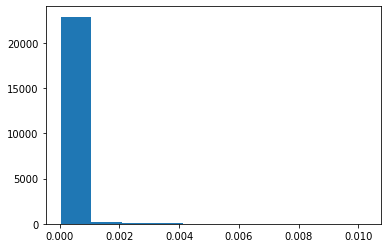

In [65]:
# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

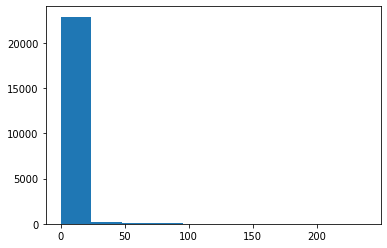

In [66]:
# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

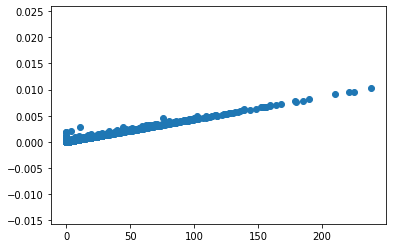

In [67]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

# Graph algorithms

## Shortest Path
You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

- Create a function called `path_exists()` that has 3 parameters - `G`, `node1`, and `node2` - and returns whether or not a path exists between the two nodes.
- Initialize the queue of nodes to visit with the first node, `node1`. `queue` should be a list.
- Iterate over the nodes in `queue`.
- Get the `neighbors` of the node using the `.neighbors()` method of the graph `G`.
- Check to see if the destination node `node2` is in the set of `neighbors`. If it is, return `True`.

In [69]:
# Define path_exists()
def path_exists(G,node1,node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True

In [73]:
path_exists(T, 1, 10)

Path exists between nodes 1 and 10


True

Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if node2 is not in neighbors.

- Using the `.add()` method, add the current node node to the set visited_nodes to keep track of what nodes have already been visited.
- Add the neighbors of the current node node that have not yet been visited to `queue`. To do this, you'll need to use the `.extend()` method of `queue` together with a list comprehension. The `.extend()` method appends all the items in a given list.
- The output expression and iterator variable of the list comprehension are both `n`. The iterable is the list `neighbors`, and the conditional is if `n` is not in the visited nodes.

In [74]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

- Check to see if the `queue` has been emptied. You can do this by inspecting the last element of queue with `[-1]`.
- Place the appropriate `return` statement for indicating whether there's a path between these two nodes.

In [75]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [82]:
path_exists(T, 1, 10)

Path exists between nodes 1 and 10


True

# Deep dive - Twitter network
You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

In [86]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

In [87]:
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

{11824}


# Communities & cliques

### Identifying triangle relationships

Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an `'occupation'` label associated with it, in which the Twitter user's work occupation is divided into `celebrity`, `politician` and `scientist`. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

In [94]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            print(n, n1, n2)
            break
    return in_triangle

In [95]:
is_in_triangle(T, 1)

1 16 18


True

### Finding nodes involved in triangles
NetworkX provides an API for counting the number of triangles that every node is involved in: `nx.triangles(G)`. It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [104]:
# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

In [106]:
# Write the assertion statement
print(nodes_in_triangle(T, 1))

{1, 16, 18, 19, 20, 21, 24, 28, 29, 30, 31, 35, 36, 37, 39, 40, 41, 43, 44, 45, 47, 48, 49}


## Finding open triangles
Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

- Write a function `node_in_open_triangle()` that has two parameters - `G` and `n` - and identifies whether a node is present in an open triangle with its neighbors.
    - In the for loop, iterate over all possible triangle relationship combinations.
    - If the nodes `n1` and `n2` do not have an edge between them, set `in_open_triangle` to `True`, `break` out from the if statement and return `in_open_triangle`.
- Use this function to count the number of open triangles that exist in `T`.
    - In the for loop, iterate over all the nodes in `T`.
    - If the current node `n` is in an open triangle, increment `num_open_triangles`.

In [111]:
# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):
            in_open_triangle = True
            print(f'Recommend friendship between {n1} and {n2}, using {n}')
            break
    return in_open_triangle

In [112]:
# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

Recommend friendship between 3 and 4, using 1
Recommend friendship between 563 and 5384, using 16
Recommend friendship between 6163 and 5578, using 18
Recommend friendship between 5 and 8, using 19
Recommend friendship between 1 and 15425, using 28
Recommend friendship between 13348 and 17044, using 34
Recommend friendship between 5 and 4390, using 36
Recommend friendship between 24 and 4434, using 37
Recommend friendship between 1 and 19313, using 39
Recommend friendship between 20369 and 1, using 42
Recommend friendship between 20450 and 20451, using 43
Recommend friendship between 1 and 21423, using 45
Recommend friendship between 51 and 52, using 50
Recommend friendship between 64 and 65, using 63
Recommend friendship between 63 and 82, using 64
Recommend friendship between 63 and 9080, using 70
Recommend friendship between 63 and 6627, using 75
Recommend friendship between 63 and 6631, using 76
Recommend friendship between 85 and 86, using 84
Recommend friendship between 95 and 96

## Finding all maximal cliques of size "n"
Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: `nx.find_cliques(G)`. Play around with the function by using it on T in the IPython Shell, and then try answering the exercise.

In [117]:
G = pd.read_pickle('../data/35. Network Analysis/github_users.p')
type(G)

networkx.classes.graph.Graph

In [118]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [124]:
print(maximal_cliques(G, 30))

[['u6936', 'u4845', 'u2242', 'u992', 'u10460', 'u2227', 'u10431', 'u1017', 'u8579', 'u5905', 'u2804', 'u6379', 'u2212', 'u6324', 'u376', 'u10349', 'u6707', 'u5709', 'u745', 'u7158', 'u6731', 'u3749', 'u7355', 'u1923', 'u2055', 'u2108', 'u3359', 'u5992', 'u3589', 'u1241']]


# Subgraphs

There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using `G.subgraph(nodes)`, which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

In [125]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

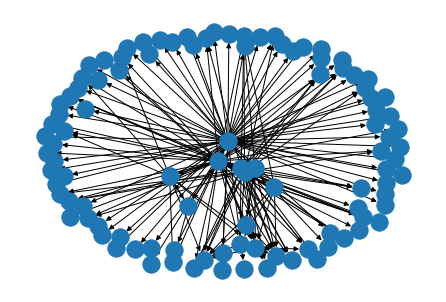

In [138]:
nodes_of_interest = [29, 38, 42, 1]

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

In the previous exercise, we gave you a list of nodes whose neighbors we asked you to extract.

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

- Using a list comprehension, extract nodes that have the metadata `'occupation'` as `'celebrity'` alongside their neighbors:
    - The output expression of the list comprehension is `n`, and there are two iterator variables: `n` and `d`. The iterable is the list of nodes of `T` (including the metadata, which you can specify using `data=True`) and the conditional expression is if the `'occupation'` key of the metadata dictionary `d` equals `'celebrity'`.
- Place them in a new subgraph called `T_sub`. To do this:
    - Iterate over the nodes, compute the neighbors of each node, and add them to the set of nodes nodeset by using the `.union()` method. This last part has been done for you.
    - Use nodeset along with the `T.subgraph()` method to calculate `T_sub`.
- Draw `T_sub` to the screen.

In [139]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T_draw.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T_draw.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

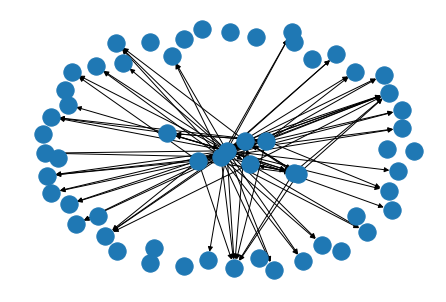

In [140]:
# Compute the subgraph using nodeset: T_sub
T_sub = T_draw.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()

# Visualizing using Circos plots
Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In [ ]:
from nxviz import CircosPlot

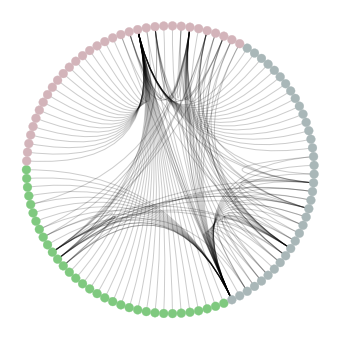

In [148]:
# Create the CircosPlot object: c
c = CircosPlot(T_draw, node_order='category',node_color='category')

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

# Visualizing using Arc plots
Following on what you've learned about the `nxviz` API, now try making an `ArcPlot` of the network. Two keyword arguments that you will try here are `node_order='keyX'` and `node_color='keyX'`, in which you specify a key in the node metadata dictionary to color and order the nodes by.

In [145]:
from nxviz import ArcPlot

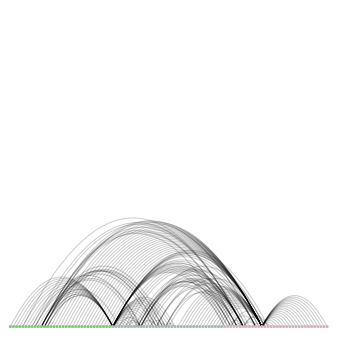

In [147]:
# Create the customized ArcPlot object: a2
a2 = ArcPlot(T_draw, node_order='category',node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

YOu want to learn more? Check https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9